I have the clean data from the previous step that includes 3 dataframes: <br>
- Order: sales data organized by order
- Items: sales data organized by line item
- Cust: sales data organized and aggregated by customer id

I will first focus on the customer sales data, as that one is higher level. Here are the columns in that dataframe:
- Cust_ID: unique indentifier for each customer <br>
- Life_Total: total dollars spent by that customer over their lifetime <br>
- Avg_Order: total dollars spent by that customer per order <br>
- Orders: number of orders by that customer <br>
- Sub_Total: sum in dollars spent by the customer not including shipping and tax <br>
- Ship_Total: total dollars spent on shipping over the life of the customer <br>
- Refund_Total: total dollars refunded to the customer <br>
- Marketing: yes or no if the customer accepts marketing (may convert to booleen) <br>
- Total_Items: total number of items ordered by the customer over their lifetime <br>
- Avg_Items: average number of items per order
- first_order: datetime of first order <br>
- last_order: datetime of last order <br>
- server: mail server used by the customer <br>
- Disc_Total: total in dollars that the customer over their lifetime <br>
- Vendor: 0 = first order from Company, 1 = first order from outside source <br>
- Emp: True = employee of the company, False = regular customer <br>
- Source: what type of device was used to place the order <br>
- ship_bill: does the shipping and billing zip code match <br>
- Area_Code: area code of the shipping phone number <br>
- Ship_Zip: zip code of the shipping address

In [10]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import ppscore as pps
from scipy.stats import ttest_ind

In [11]:
import pickle
os.chdir("C:\Springboard\Github\Capstone2_cust\Intermediate_Data")

In [12]:
# load the pickled version of the Customer DF (Cust)
df = pickle.load(open("Cust4.pkl", "rb"))
# look at the first 10 rows of this file
df.head(10)

,Cust_ID,Life_Total,Avg_Order,first_total,Orders,Sub_Total,Ship_Total,Refund_Total,Marketing_lf,Marketing_first,...,last_order,server,Disc_Total,Vendor,Emp,Source,ship_bill,Area_Code,Ship_Zip,lead_sku
0,75306.0,0.00,0.00,0.00,1,0.00,0.0,0.0,0,0,...,2020-03-18 04:04:53+00:00,custom,154.00,0.0,True,iphone,False,NaN,32817,BES3001
1,112053.0,145.58,145.58,145.58,1,145.58,0.0,0.0,1,1,...,2019-11-26 21:44:16+00:00,custom,16.17,1.0,False,web,True,404,30087,ROUTEINS14
2,112055.0,137.55,137.55,137.55,1,137.55,0.0,0.0,0,0,...,2019-11-26 20:52:08+00:00,custom,0.00,1.0,False,web,True,845,12545,ROUTEINS13
3,112095.0,22.98,22.98,22.98,1,22.98,0.0,0.0,1,1,...,2019-11-26 18:12:04+00:00,custom,0.00,1.0,False,web,True,262,53402,ROUTEINS10
4,130108.0,28.00,28.00,28.00,1,28.00,0.0,0.0,0,0,...,2019-08-07 18:14:49+00:00,custom,0.00,0.0,False,web,True,617,01983,BEM1003
5,130110.0,12.00,12.00,12.00,1,12.00,0.0,0.0,1,1,...,2019-08-07 18:05:28+00:00,custom,0.00,0.0,False,web,True,740,43143,BEM2002
6,130188.0,42.00,42.00,42.00,1,42.00,0.0,0.0,0,0,...,2019-08-07 03:45:52+00:00,custom,0.00,0.0,False,web,True,701,58801,BES1006
7,130231.0,27.20,27.20,27.20,1,27.20,0.0,0.0,1,1,...,2019-08-06 22:00:54+00:00,custom,6.80,0.0,False,web,True,754,33026,BEM6001
8,130241.0,22.00,22.00,22.00,1,22.00,0.0,22.0,1,1,...,2019-08-06 20:22:25+00:00,custom,0.00,0.0,False,web,True,NaN,01880,BES5001
9,130245.0,100.00,100.00,100.00,1,100.00,0.0,100.0,1,1,...,2019-08-06 19:59:05+00:00,custom,0.00,0.0,False,web,True,617,01880,BEM1007


In [13]:
# let's add a column if they are a repeat customer (ordered more than once)
df['repeat'] = df['Orders'] > 1

In [14]:
df['weekday'] = df['first_order'].dt.day_name()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39771 entries, 0 to 39770
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Cust_ID          39771 non-null  float64            
 1   Life_Total       39771 non-null  float64            
 2   Avg_Order        39771 non-null  float64            
 3   first_total      39771 non-null  float64            
 4   Orders           39771 non-null  int64              
 5   Sub_Total        39771 non-null  float64            
 6   Ship_Total       39771 non-null  float64            
 7   Refund_Total     39771 non-null  float64            
 8   Marketing_lf     39771 non-null  int64              
 9   Marketing_first  39771 non-null  int64              
 10  Total_Items      39771 non-null  int64              
 11  Avg_Items        39771 non-null  float64            
 12  first_items      39771 non-null  int64              
 13  first_order     

In [16]:
df['Area_Code'].fillna('unknown', inplace=True)

In [17]:
df['Ship_Zip'].fillna('unknown', inplace=True)

In [18]:
df.describe()

,Cust_ID,Life_Total,Avg_Order,first_total,Orders,Sub_Total,Ship_Total,Refund_Total,Marketing_lf,Marketing_first,Total_Items,Avg_Items,first_items,Disc_Total,Vendor
count,3.977100e+04,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000,39771.000000
mean,2.130449e+12,102.437610,62.273366,60.172606,1.546856,99.469555,1.678049,2.155301,0.677604,0.412763,3.599733,2.177243,2.122954,2.319155,0.551709
std,5.576757e+11,142.792375,44.557245,44.827090,1.582350,138.446262,5.369948,17.297491,1.247802,0.492337,4.872447,1.107580,1.186153,21.090725,0.497325
min,7.530600e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,1.928451e+12,32.980000,32.980000,32.000000,1.000000,32.980000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000
50%,2.073490e+12,61.960000,54.970000,54.970000,1.000000,57.960000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,1.000000
75%,2.569577e+12,107.160000,73.536667,69.970000,1.000000,103.560000,0.000000,0.000000,1.000000,1.000000,4.000000,2.428571,2.000000,0.000000,1.000000
max,2.779653e+12,4813.390000,683.300000,683.300000,48.000000,4516.200000,297.190000,642.550000,44.000000,1.000000,142.000000,40.000000,40.000000,1723.380000,1.000000


These are very interesting. The outliers are extremely different. Let's visualize it.

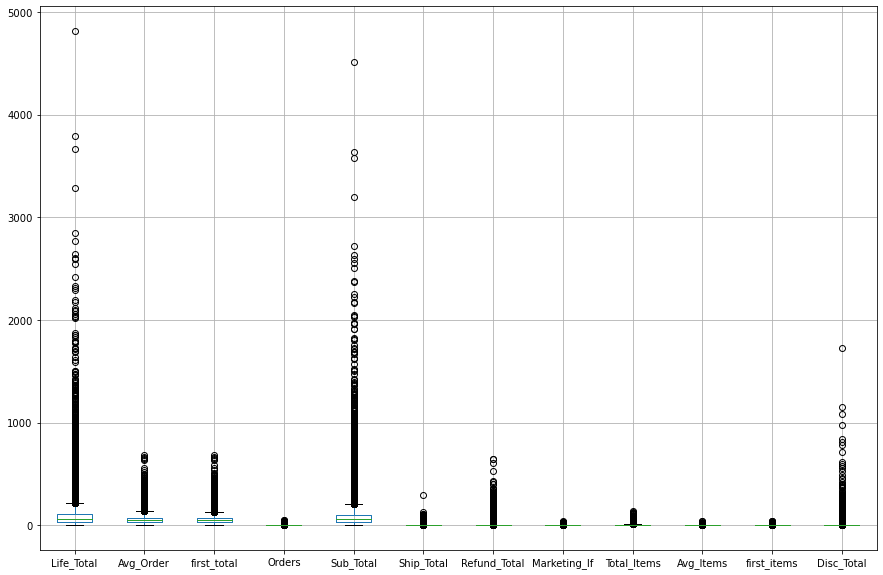

In [19]:
_ = df.drop(['Cust_ID', 'Emp', 'ship_bill', 'repeat', 'Marketing_first', 'Vendor'], axis=1).boxplot(figsize=(15,10))

That looks like a lot of outliers with a massive range. All of those outliers are what we are looking for. Maybe we should consider outliers based on REPEAT customers.

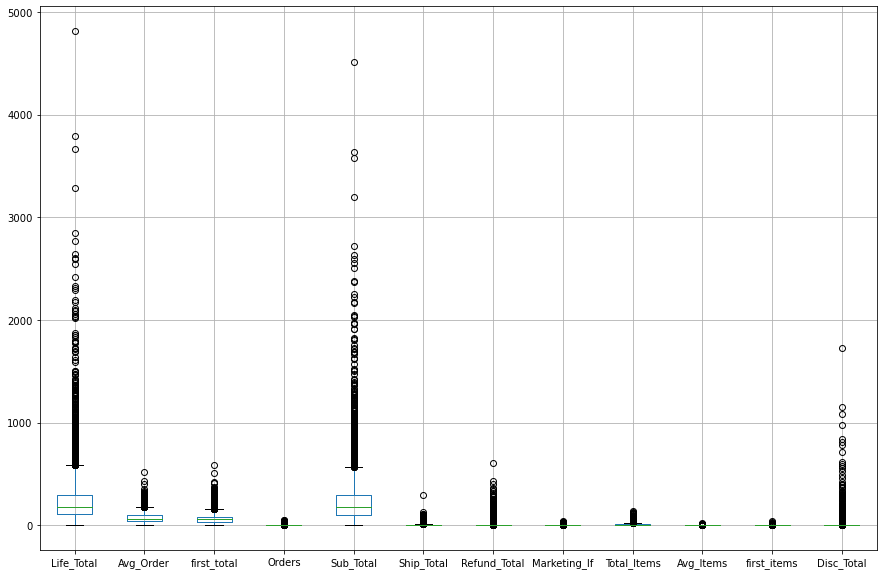

In [20]:
rep = df[df['repeat']]
_ = rep.drop(['Cust_ID', 'Emp', 'ship_bill', 'repeat', 'Marketing_first', 'Vendor'], axis=1).boxplot(figsize=(15,10))

These look like there are tons of outliers and these may have an exponential distribution.

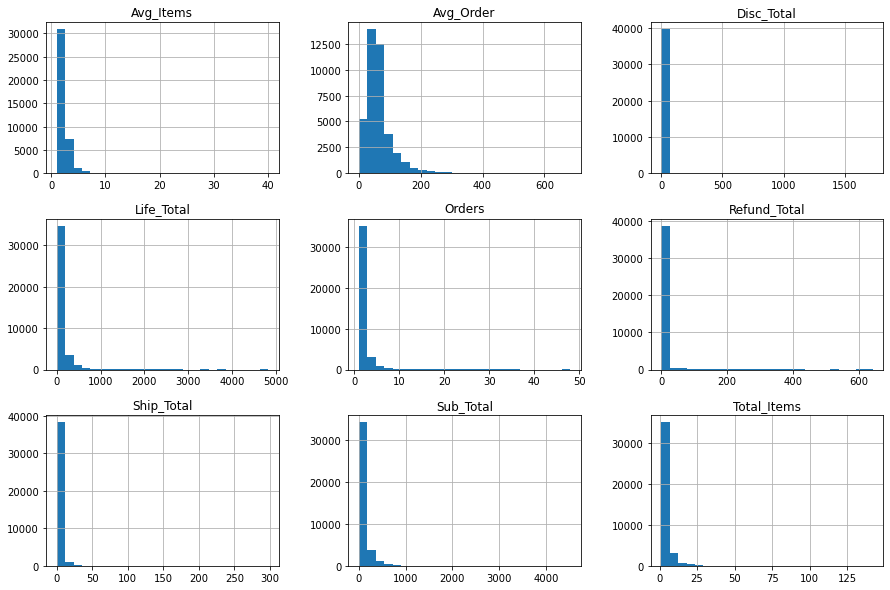

In [21]:
hist = df[['Life_Total', 'Avg_Order', 'Orders', 'Sub_Total', 'Ship_Total', 'Refund_Total', 'Total_Items', 'Avg_Items', 'Disc_Total', 'weekday']].hist(bins=25, figsize=(15,10))
plt.savefig('variable_distribution.png',bbox_inches='tight')

Just as the stats indicated, there is a massive difference, where a few customers make up the vast majority of orders and money spent.

In [22]:
# number of repeat customers
df['repeat'].value_counts()

False    30072
True      9699
Name: repeat, dtype: int64

In [23]:
9699/df.shape[0]

0.2438711624047673

Let's take a look at those same histograms just for the repeat customers

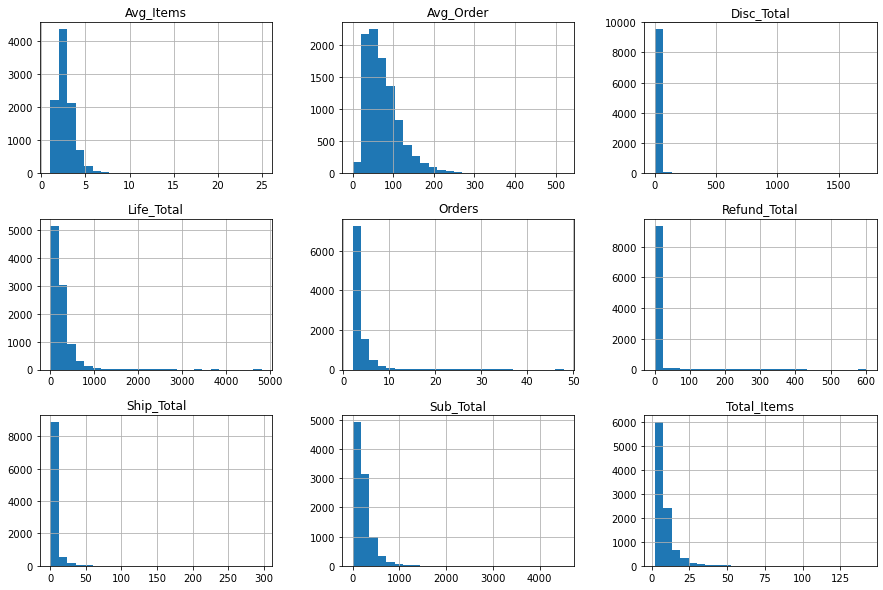

In [24]:
_ = rep[['Life_Total', 'Avg_Order', 'Orders', 'Sub_Total', 'Ship_Total', 'Refund_Total', 'Total_Items', 'Avg_Items', 'Disc_Total']].hist(bins=25, figsize=(15,10))
plt.savefig('variable_distribution2.png',bbox_inches='tight')

These plots do reflect a group of buyers that has purchased more as measured by money, items, and total orders. The distribution still looks exponential. <br>
<br>
Since the distribution is exponential, let's take the log of at least the lifetime spending to turn that into something closer to a normal distribution

In [25]:
# let's drop zero lifetime values from the dataframe
df = df[df['Life_Total'] > 1]

# let's look at the log of lifetime value; since it's exponential, that may correlate better to some features
df['life_lg'] = np.log10(df['Life_Total'])

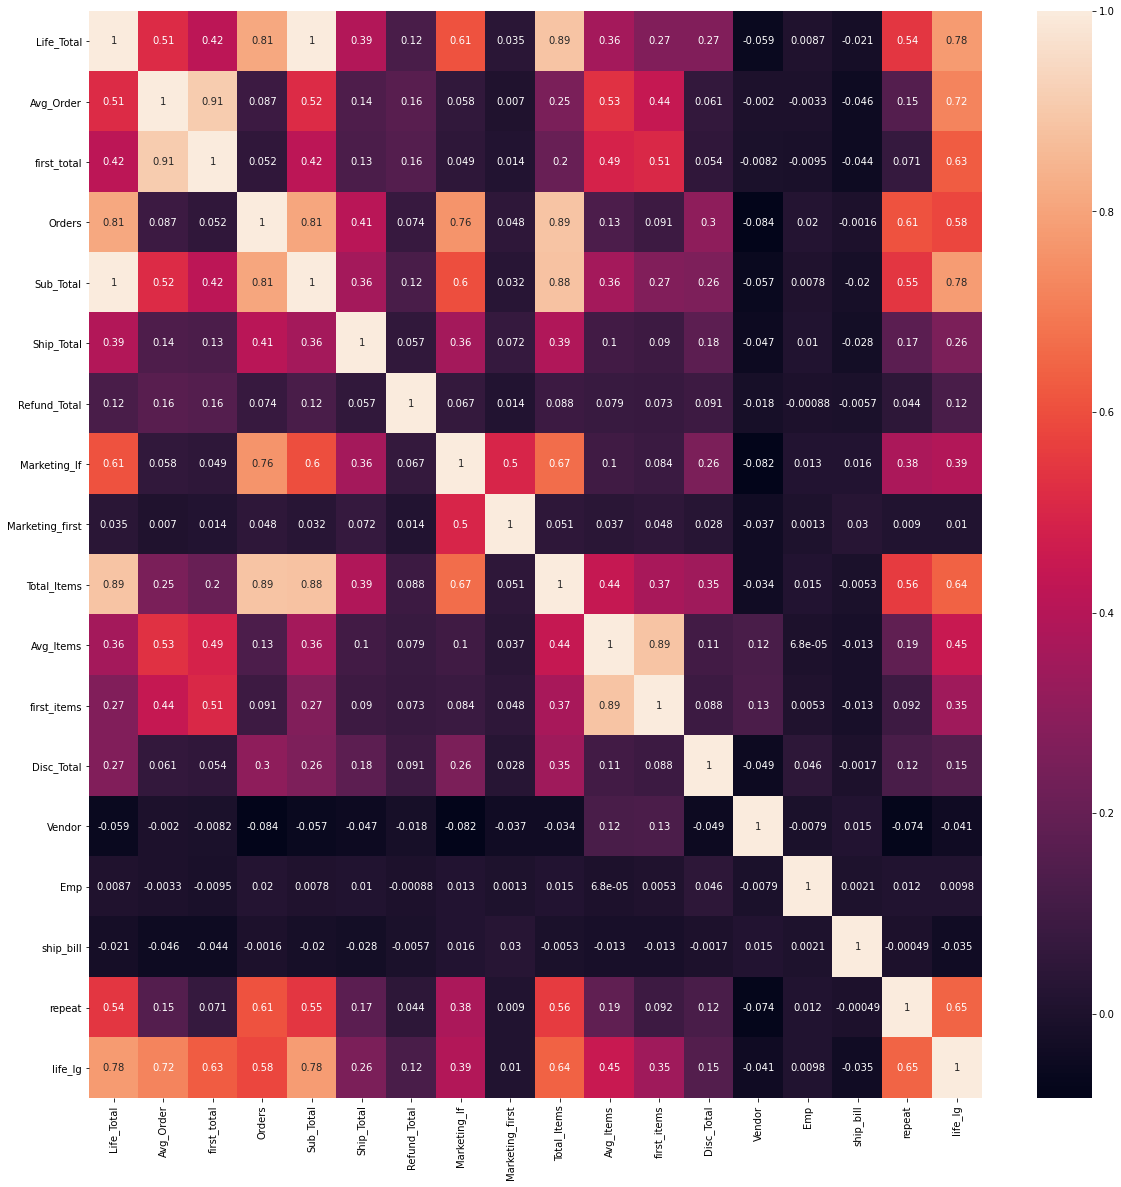

In [26]:
# let's look at the correlation coefficient 
corr = df.drop(['Cust_ID'], axis=1).corr()
fig, ax = plt.subplots(figsize=(20,20))
_ = sns.heatmap(corr, annot=True, ax=ax)
plt.savefig('variable_distribution2.png',bbox_inches='tight')

These all look very much as expected: of course if they are a repeat customer they will have more orders and a higher lifetime total. We may want to consider adding more features to this heatmap to see if there is correlation from items that could help predict sales.

Actually, their appears to be a strong correlation between accepting marketing and all of the positive repeat metrics.

Perhaps the predictve power look may turn up some more insights.

In [27]:
# calculates the predictive power score 
#df_pps = pps.matrix(df, 'Life_Total')
# plots that predictive power score
#fig, ax = plt.subplots(figsize=(20,20))
#_ = sns.heatmap(df_pps, annot=True, ax=ax)
#df_pps

That did not work so well. We may have to revisit this.

### Let's look at the timing of when a customer placed their first order and how that may effect if they are a repeat customer

In [28]:
# look to see if we can save this groupby values into a DF. Then do the calculations in that DF and plot
temp = df.groupby([df["first_order"].dt.year, df["first_order"].dt.month]).sum()

In [29]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 95 entries, (2012, 10) to (2020, 9)
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Cust_ID          95 non-null     float64
 1   Life_Total       95 non-null     float64
 2   Avg_Order        95 non-null     float64
 3   first_total      95 non-null     float64
 4   Orders           95 non-null     int64  
 5   Sub_Total        95 non-null     float64
 6   Ship_Total       95 non-null     float64
 7   Refund_Total     95 non-null     float64
 8   Marketing_lf     95 non-null     int64  
 9   Marketing_first  95 non-null     int64  
 10  Total_Items      95 non-null     int64  
 11  Avg_Items        95 non-null     float64
 12  first_items      95 non-null     int64  
 13  Disc_Total       95 non-null     float64
 14  Vendor           95 non-null     float64
 15  Emp              95 non-null     float64
 16  ship_bill        95 non-null     float64
 17  re

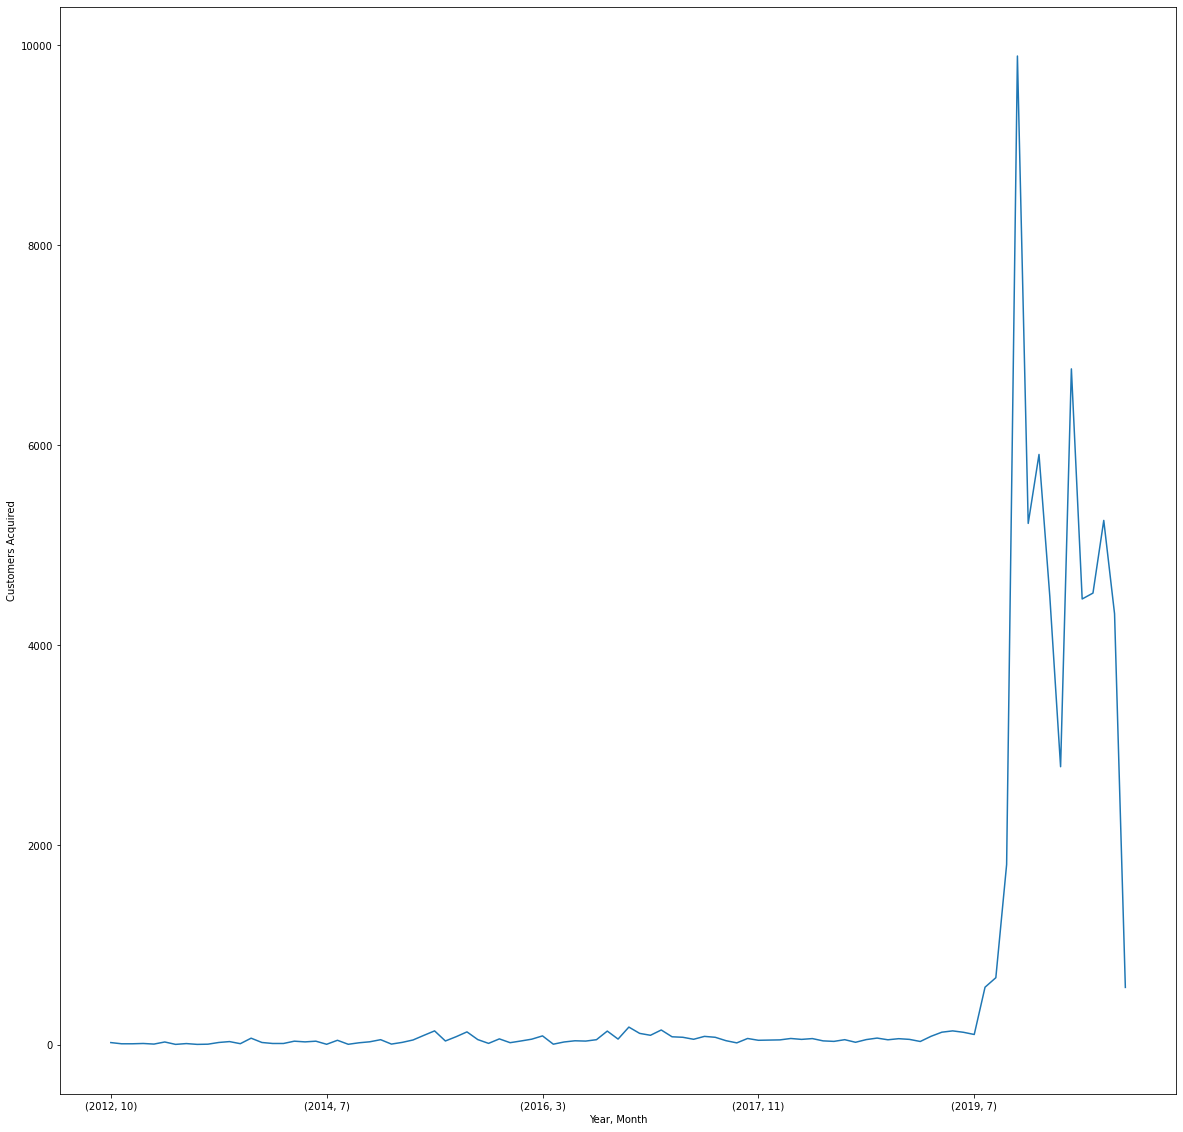

In [30]:
fig, ax = plt.subplots(figsize=(20,20))
_ = temp['Orders'].plot(kind="line")
_ = plt.xlabel('Year, Month')
_ = plt.ylabel('Customers Acquired')

Looks like an explosion of orders starting in August 2019. We will come back to this to see if this affected Churn or Customer Retention. Let's start by looking at if they were a repeat customer based on the date.

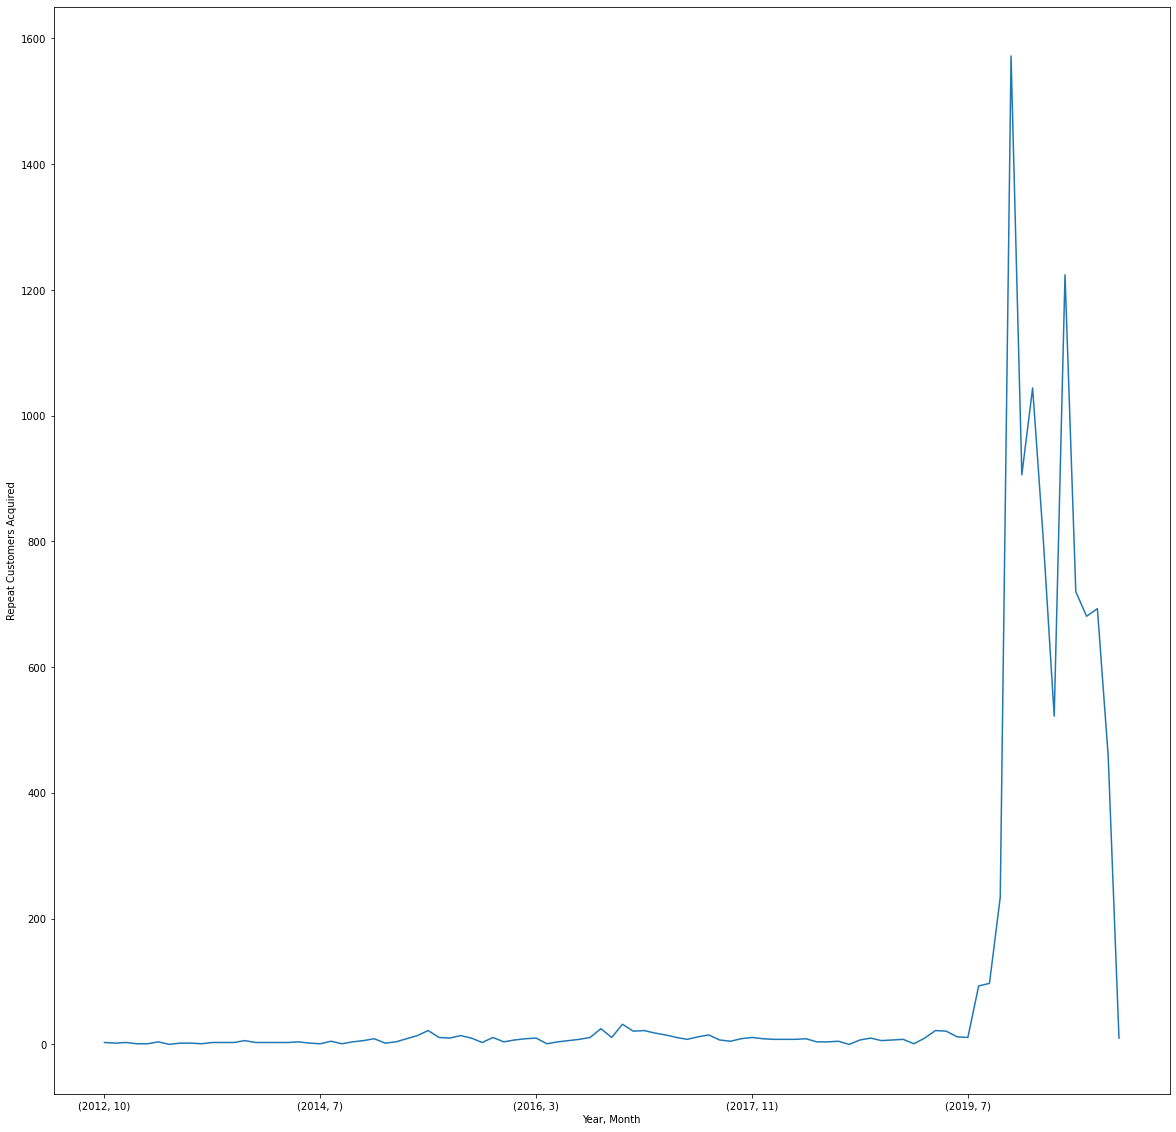

In [31]:
# number of repeat customers that were acquired during a time
fig, ax = plt.subplots(figsize=(20,20))
_ = temp['repeat'].plot(kind="line")
_ = plt.xlabel('Year, Month')
_ = plt.ylabel('Repeat Customers Acquired')

Honestly, this looks like it just mirrors the customer first purchase date (even for churned customers) <br>
<br>
Let's look at the percentage of repeat customers acquired during a particular time 

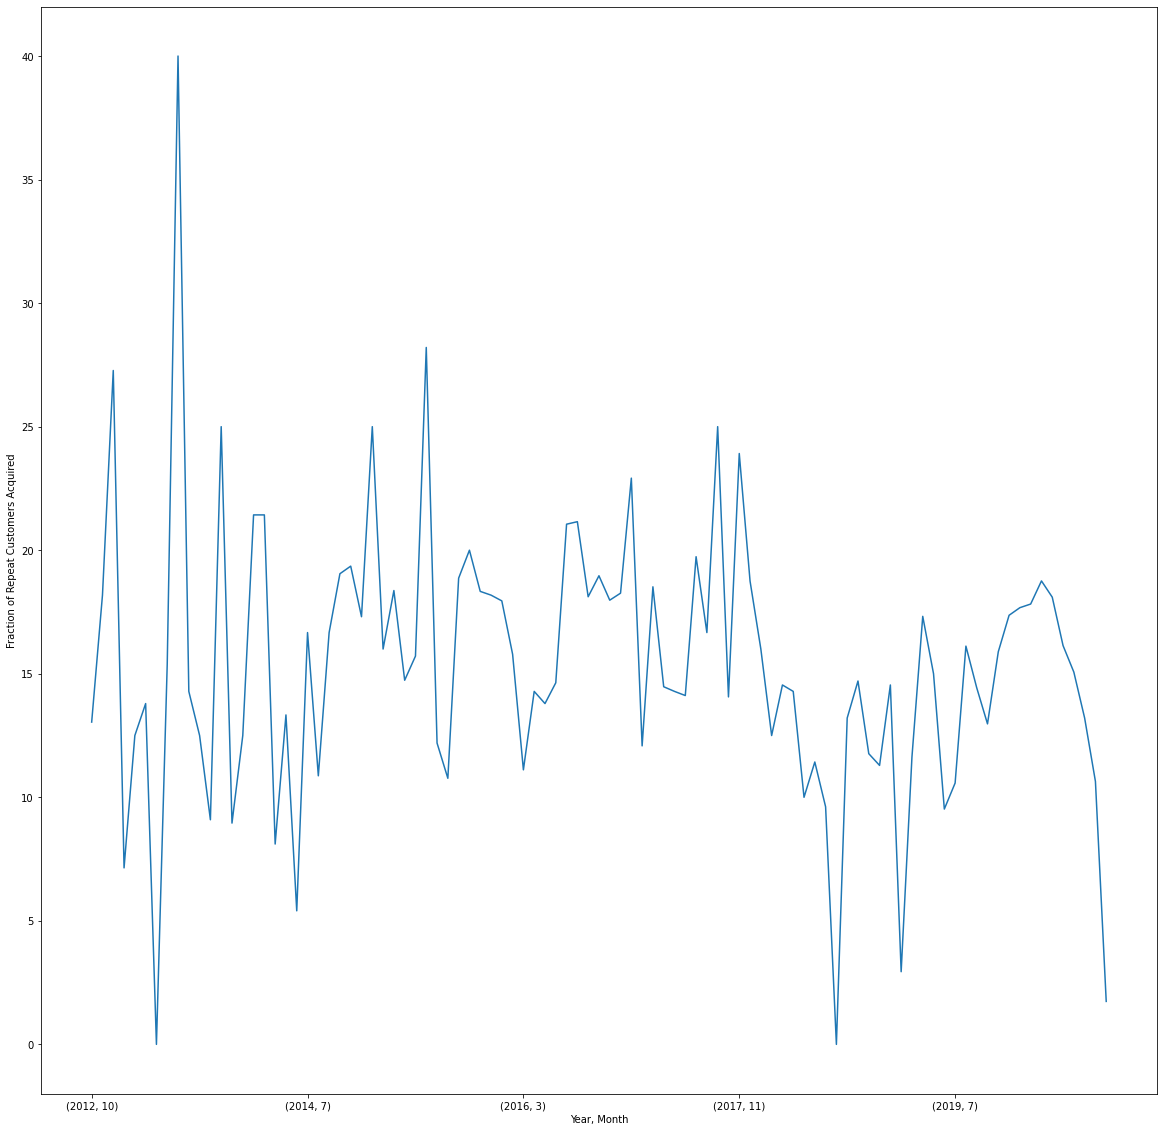

In [32]:
# let's see the percentage of repeat customers acquired over time
temp['repeat_prc'] = (temp['repeat']/temp['Orders'])*100
# number of repeat customers that were acquired during a time
fig, ax = plt.subplots(figsize=(20,20))
_ = temp['repeat_prc'].plot(kind="line")
_ = plt.xlabel('Year, Month')
_ = plt.ylabel('Fraction of Repeat Customers Acquired')
plt.savefig('repeat_all_time.png',bbox_inches='tight')

This looks almost random over time with a slight downward trend starting at the end of 2017. <br>
<br>
Let's see if the days of the week that a customer was first acquired has an impact on repeat customers

In [33]:
days = df.groupby(df["weekday"]).sum()
days = days.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
days

,Cust_ID,Life_Total,Avg_Order,first_total,Orders,Sub_Total,Ship_Total,Refund_Total,Marketing_lf,Marketing_first,Total_Items,Avg_Items,first_items,Disc_Total,Vendor,Emp,ship_bill,repeat,life_lg
weekday,,,,,,,,,,,,,,,,,,,
Monday,1.144457e+16,573140.38,334845.298751,323011.13,8639,555993.11,8959.39,12695.45,3782,2186,20312,11676.566868,11408,14393.24,2973.0,0.0,4939.0,1401.0,9828.919624
Tuesday,1.126246e+16,560010.64,333064.413777,323096.56,8374,544577.42,9195.79,12124.37,3603,2077,19824,11679.565111,11467,11204.16,2894.0,1.0,4837.0,1344.0,9643.836606
Wednesday,1.136790e+16,536901.06,331014.713997,321123.04,8082,520418.17,9395.57,11797.73,3275,1954,18681,11414.960683,11085,11742.74,2894.0,1.0,4820.0,1270.0,9586.397523
Thursday,1.127148e+16,531443.07,332925.714022,322398.11,8041,514906.25,9642.92,11288.76,3518,2164,18415,11425.299161,11124,11770.67,2931.0,0.0,4827.0,1256.0,9615.902360
Friday,1.239542e+16,608900.98,365601.662262,354392.84,9233,591102.36,10437.48,11856.50,4149,2454,21471,12802.126768,12569,15519.92,3255.0,0.0,5415.0,1479.0,10678.912524
Saturday,1.337695e+16,635187.64,385459.033516,368305.87,9664,617703.77,9607.30,11953.80,4412,2790,22342,13594.508427,13176,13232.05,3465.0,0.0,5847.0,1450.0,11356.162298
Sunday,1.356550e+16,628454.56,393755.354861,380789.33,9458,611294.76,9499.23,13998.92,4196,2780,22038,13929.622552,13536,10804.76,3517.0,0.0,5893.0,1495.0,11465.104562


This is interesting. Let's plot it out. Lifetime total, total orders, and number of repeat customers

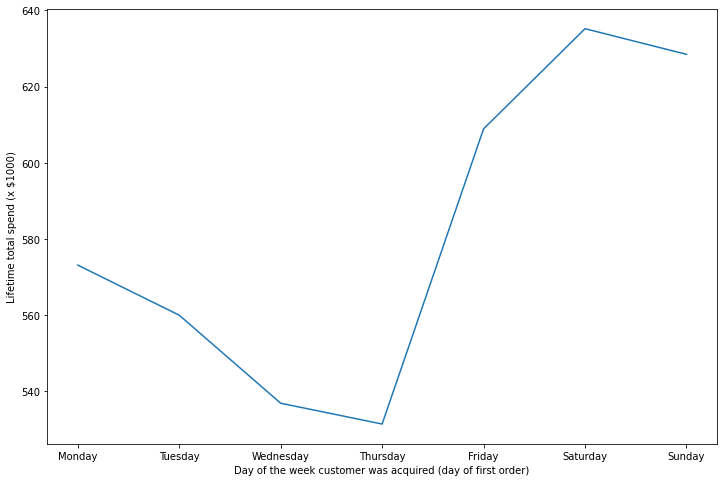

In [34]:
# plot the total lifetime purchase vs. day of the week
_ = (days['Life_Total']/1000).plot(kind='line', figsize=(12,8))
_ = plt.xlabel('Day of the week customer was acquired (day of first order)')
_ = plt.ylabel('Lifetime total spend (x $1000)')

This is really cool to see; customers that place their first order on Saturday account for $100k more in lifetime revenue than customers that place their first order on Thursday. This could be sheer number of customers acquired on Saturday or stronger loyalty; we will see when we do some more calculations with this further down. Let's see how some of the other data relates to the day of the week a customer was first acquired. Let's look at:<br>
- Repeat (number of repeat customers acquired on a particular day)
- Total_Items (over lifetime)

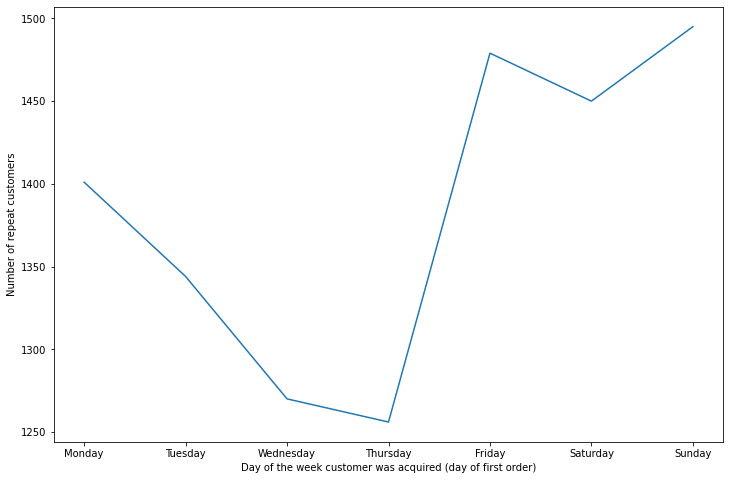

In [35]:
# plot the total lifetime purchase vs. day of the week
_ = (days['repeat']).plot(kind='line', figsize=(12,8))
_ = plt.xlabel('Day of the week customer was acquired (day of first order)')
_ = plt.ylabel('Number of repeat customers')

This shows a very similar trend to the lifetime purchases, except Saturday shows a little dip. It's probably because Saturday orders could be a lot of one-time orders or those ordering on Saturday, could just be larger. We can look at that calculation later.

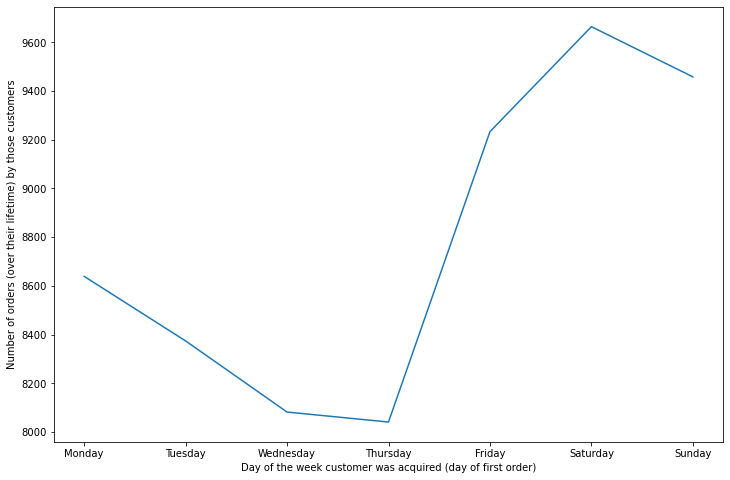

In [36]:
# plot the total lifetime purchase vs. day of the week
_ = (days['Orders']).plot(kind='line', figsize=(12,8))
_ = plt.xlabel('Day of the week customer was acquired (day of first order)')
_ = plt.ylabel('Number of orders (over their lifetime) by those customers')

This looks similar to total lifetime spent graph. I can dive into these numbers more as we look at order data.

In [37]:
# number of customers by day of week they were acquired
day_cust = df.groupby(df["weekday"])['Cust_ID'].count()

In [38]:
# number of REPEAT customers by day of week they were acquired
day_cust_rep = df[df['repeat']].groupby(df["weekday"])['Cust_ID'].count()

In [39]:
# percentage or repeat customer that purchase for the first time relative to all customers that purchase on a day
day_rep_rate = (day_cust_rep / day_cust)*100
day_rep_rate = day_rep_rate.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
day_rep_rate

weekday
Monday       26.002227
Tuesday      25.454545
Wednesday    24.048476
Thursday     23.778872
Friday       25.260461
Saturday     22.983040
Sunday       23.539600
Name: Cust_ID, dtype: float64

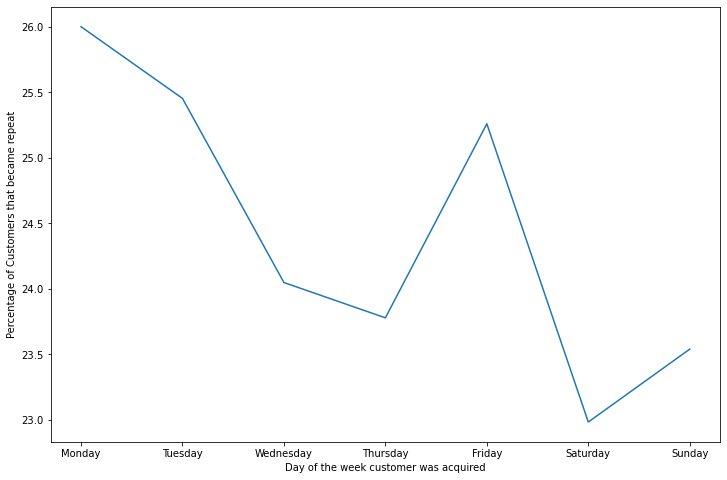

In [40]:
_ = day_rep_rate.plot(kind='line', figsize=(12,8))
_ = plt.xlabel('Day of the week customer was acquired')
_ = plt.ylabel('Percentage of Customers that became repeat')
plt.savefig('weekday_acquired_repeat.png',bbox_inches='tight')

This is counter to the above graph that showed more a larger chunk of lifetime purchasers were acquired on Saturday and Sunday. Maybe this is because there is way more one-time purchasers that happen on Saturday and Sunday. Let's look at total customers that purchased for the first time on any day.

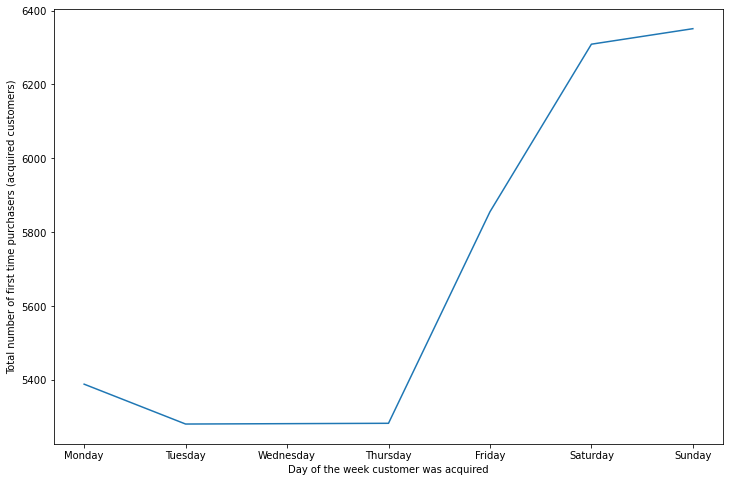

In [41]:
# change directory to save figure
os.chdir('C:\Springboard\Github\Capstone2_cust') 


# number of customers by day of week they were acquired
day_cust = day_cust.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
_ = day_cust.plot(kind='line', figsize=(12,8))
_ = plt.xlabel('Day of the week customer was acquired')
_ = plt.ylabel('Total number of first time purchasers (acquired customers)')
plt.savefig('weekday_acquired.png',bbox_inches='tight')

That explains alot. The total number of first time purchasers on Saturday and Sunday are much higher, so the lifetime values from those days is higher, but on a customer by customer basis, those that purchase on Saturday and Sunday are slightly less likely to repeat.

In [42]:
#df[df['weekday'] == 'Monday']

In [43]:
# Possible test in the future: let's test those numbers - this is not an average, so I'm not sure if testing applies
# testing if customer on Monday are statistically significant in their lifetime purchases over customers acquired on Sunday
# ttest_ind(df[df['weekday'] == 'Monday']['Life_Total'], df[df['weekday'] == 'Sunday']['Life_Total'] )

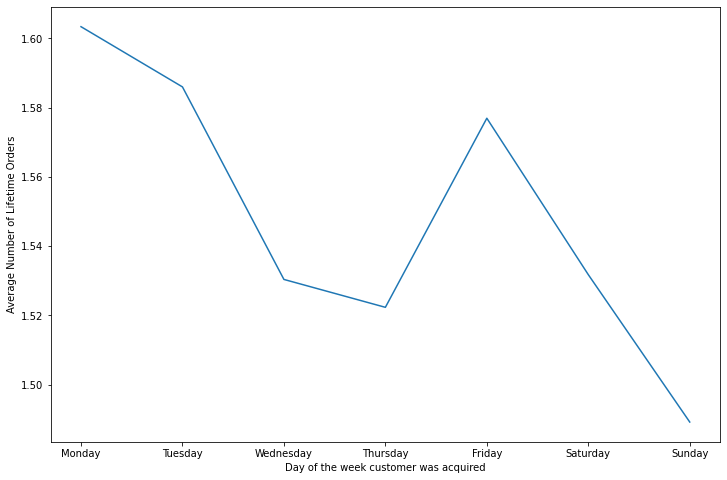

In [44]:
# average number of orders by day of week customers were acquired
# number of customers by day of week they were acquired
day_cust_avg = df.groupby(df["weekday"])['Orders'].mean()
day_cust_avg = day_cust_avg.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
_ = day_cust_avg.plot(kind='line', figsize=(12,8))
_ = plt.xlabel('Day of the week customer was acquired')
_ = plt.ylabel('Average Number of Lifetime Orders')

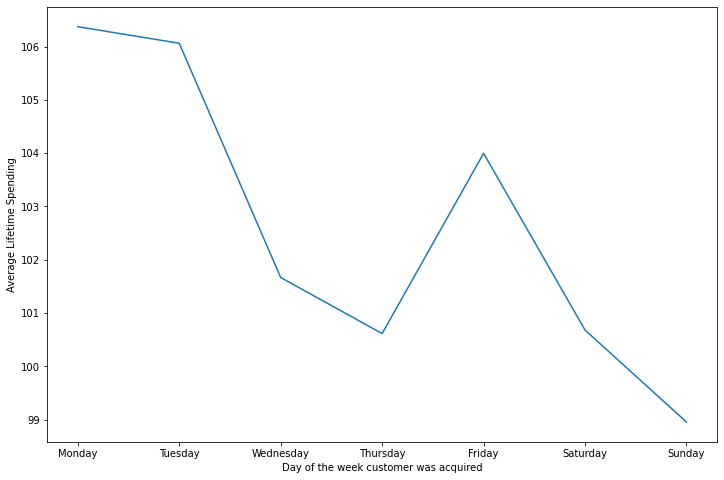

In [45]:
# average lifetime spending based on the day they were acquired
day_cust_life = df.groupby(df["weekday"])['Life_Total'].mean()
day_cust_life = day_cust_life.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
_ = day_cust_life.plot(kind='line', figsize=(12,8))
_ = plt.xlabel('Day of the week customer was acquired')
_ = plt.ylabel('Average Lifetime Spending')
plt.savefig('weekday_clv.png',bbox_inches='tight')

These graphs just muddled what the graphs above show. It could just be much higher sales volume on Saturday and Sunday that make those show a higher lifetime value <br>
<br>
Let's test this: <br>

In [46]:
from scipy.stats import ttest_ind
# testing if customer on Monday are statistically significant in their lifetime purchases over customers acquired on Sunday
ttest_ind(df[df['weekday'] == 'Monday']['Life_Total'], df[df['weekday'] == 'Sunday']['Life_Total'] )

Ttest_indResult(statistic=2.715369477298399, pvalue=0.006629871909168353)

That's a very significant result. Monday's average lifetime total is statistically significant 99.3% confidence that Monday's average CLV is greater than Sunday's.

#### Let's do similar calculations for the month they first purchased

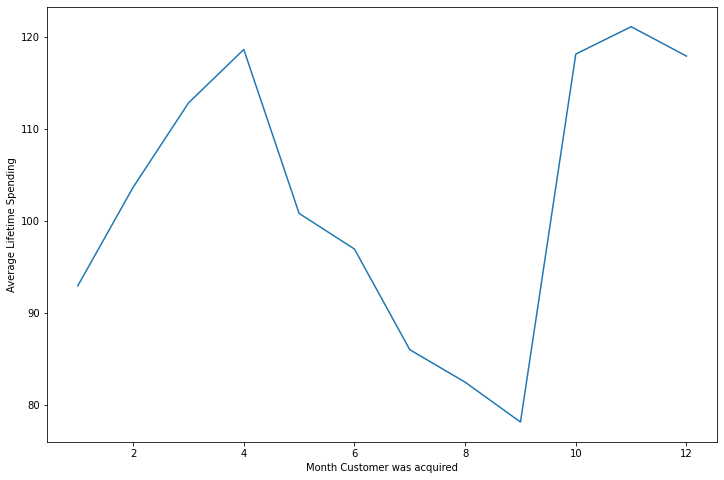

In [47]:
# Calculate the average lifetime spending based on when they were acquired (date of first purchase)
df['mon'] = df['first_order'].dt.month
mon_cust_life = df.groupby(df["mon"])['Life_Total'].mean()
_ = mon_cust_life.plot(kind='line', figsize=(12,8))
_ = plt.xlabel('Month Customer was acquired')
_ = plt.ylabel('Average Lifetime Spending')
plt.savefig('month_clv.png',bbox_inches='tight')

This is an impressive difference. Let's test it for significance before moving on. <br>
Testing: if customers acquired in November had a significantly larger average lifetime value than customer acquired in November

In [48]:
# testing if customers in November are statistically significant in their lifetime purchases over customers acquired in September
ttest_ind(df[df['mon'] == 9]['Life_Total'], df[df['mon'] == 11]['Life_Total'] )

Ttest_indResult(statistic=-6.891744014101195, pvalue=6.0465140051694694e-12)

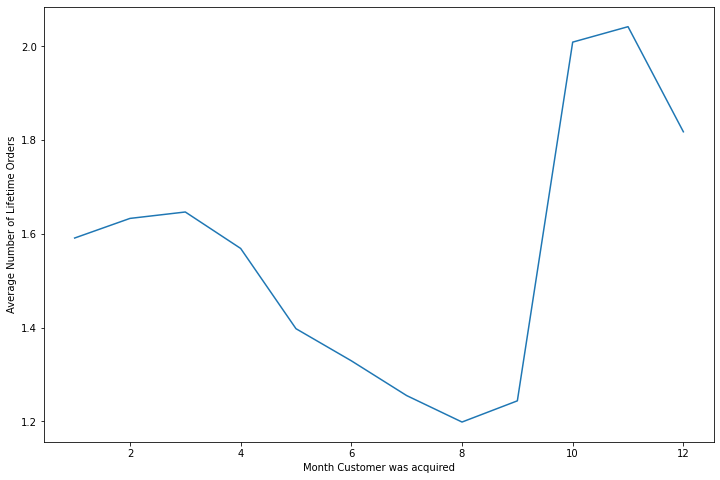

In [49]:
# Calculate the average number of lifetime orders based on when they were acquired
df['mon'] = df['first_order'].dt.month
mon_cust_avg = df.groupby(df["mon"])['Orders'].mean()
_ = mon_cust_avg.plot(kind='line', figsize=(12,8))
_ = plt.xlabel('Month Customer was acquired')
_ = plt.ylabel('Average Number of Lifetime Orders')

This is very interesting. Customer acquired in October, November, and December have a much higher average lifetime purchase than customers acquired in August and September. <br>
To make these more useful, it's better to make them strings so we can treat them as catagories; month 12 isn't 12x as much of a month as January, so keeping the integers doesn't make sense.

In [50]:
df['mon'].replace(to_replace=[x for x in range(1,13)], value=['January','February','March','April','May','June','July','August','September','October','November','December'], inplace=True)

In [51]:
# look at the skew of the CLV
df['Life_Total'].skew()

6.995140485856534

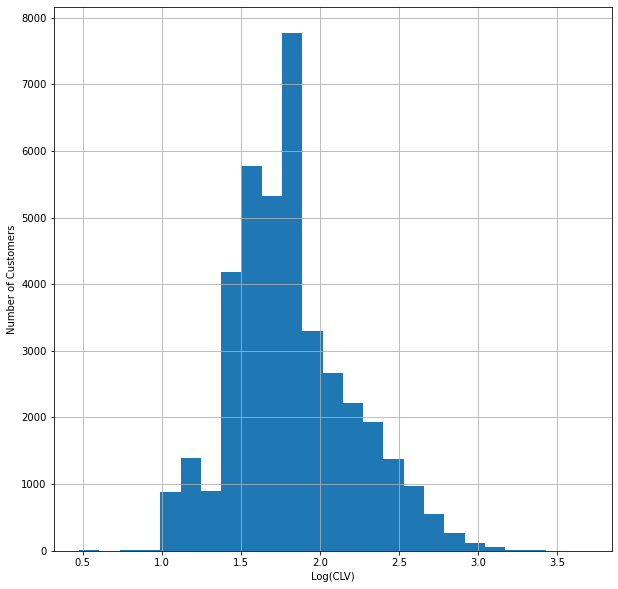

In [52]:
# let's look at that distribution
_ = df['life_lg'].hist(bins=25, figsize=(10,10))
_ = plt.xlabel('Log(CLV)')
_ = plt.ylabel('Number of Customers')
plt.savefig('CLV_log_distribution.png',bbox_inches='tight')

This look like a much better distribution than prior to taking the log. Let's see how it affected the skew of this data in particular and some of the correlations.

In [53]:
df['life_lg'].skew()

0.507506413601278

In [54]:
df.columns

Index(['Cust_ID', 'Life_Total', 'Avg_Order', 'first_total', 'Orders',
       'Sub_Total', 'Ship_Total', 'Refund_Total', 'Marketing_lf',
       'Marketing_first', 'Total_Items', 'Avg_Items', 'first_items',
       'first_order', 'last_order', 'server', 'Disc_Total', 'Vendor', 'Emp',
       'Source', 'ship_bill', 'Area_Code', 'Ship_Zip', 'lead_sku', 'repeat',
       'weekday', 'life_lg', 'mon'],
      dtype='object')

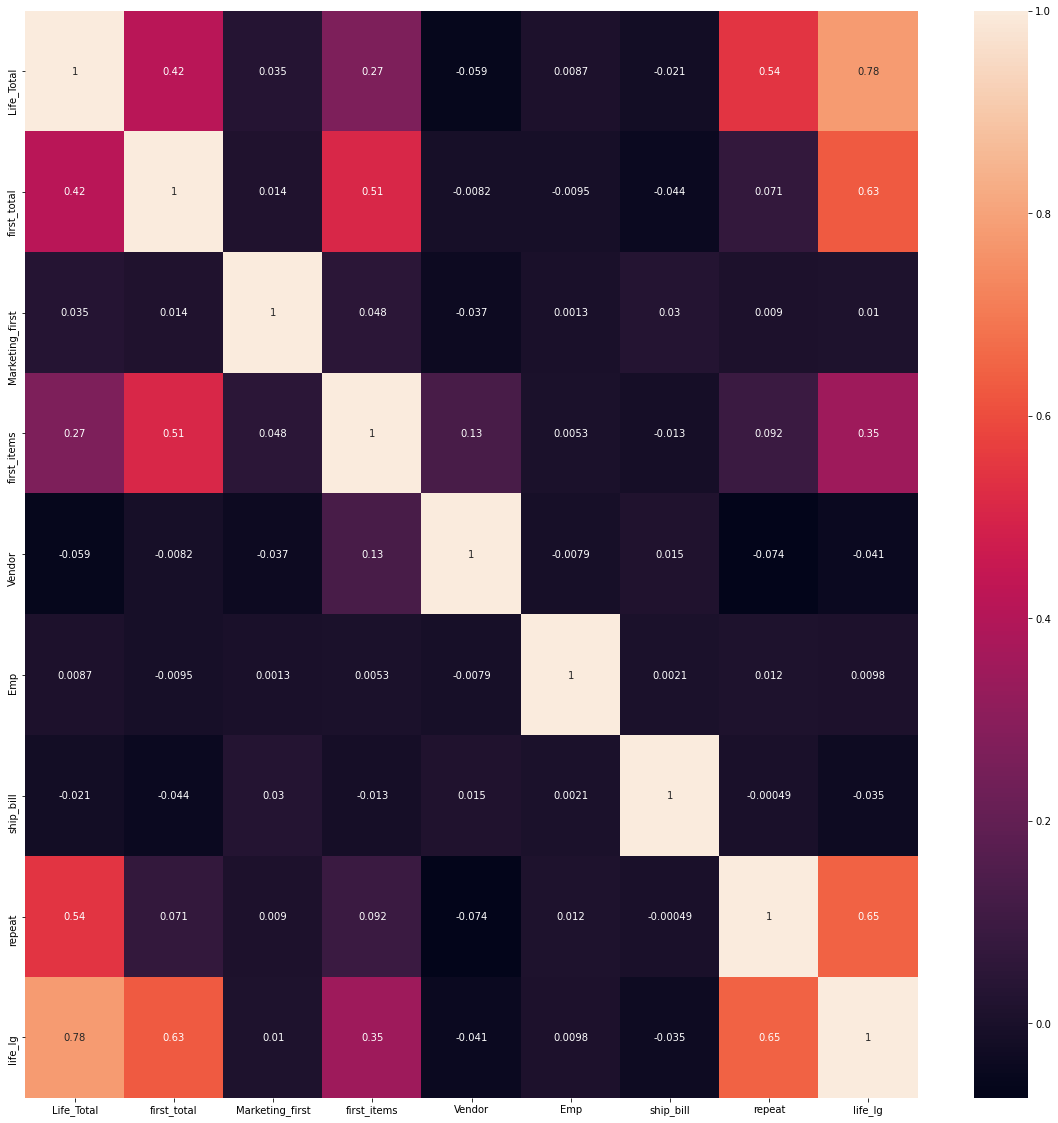

In [155]:
# let's look at the correlation coefficient just based on the first order
corr = df.drop(['Cust_ID','Avg_Order','Orders', 'Sub_Total', 'Ship_Total', 'Refund_Total', 'Marketing_lf', 'Total_Items', 'Avg_Items', 'last_order', 'Disc_Total', ], axis=1).corr()
fig, ax = plt.subplots(figsize=(20,20))
_ = sns.heatmap(corr, annot=True, ax=ax)

It looks like the log of lifetime value has better correlation to important measures like First Order Total and First Items. I think this is a good way to start.

C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least

C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least

C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\sjrek\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:667: UserWarning: The least

ValueError: Must pass 2-d input

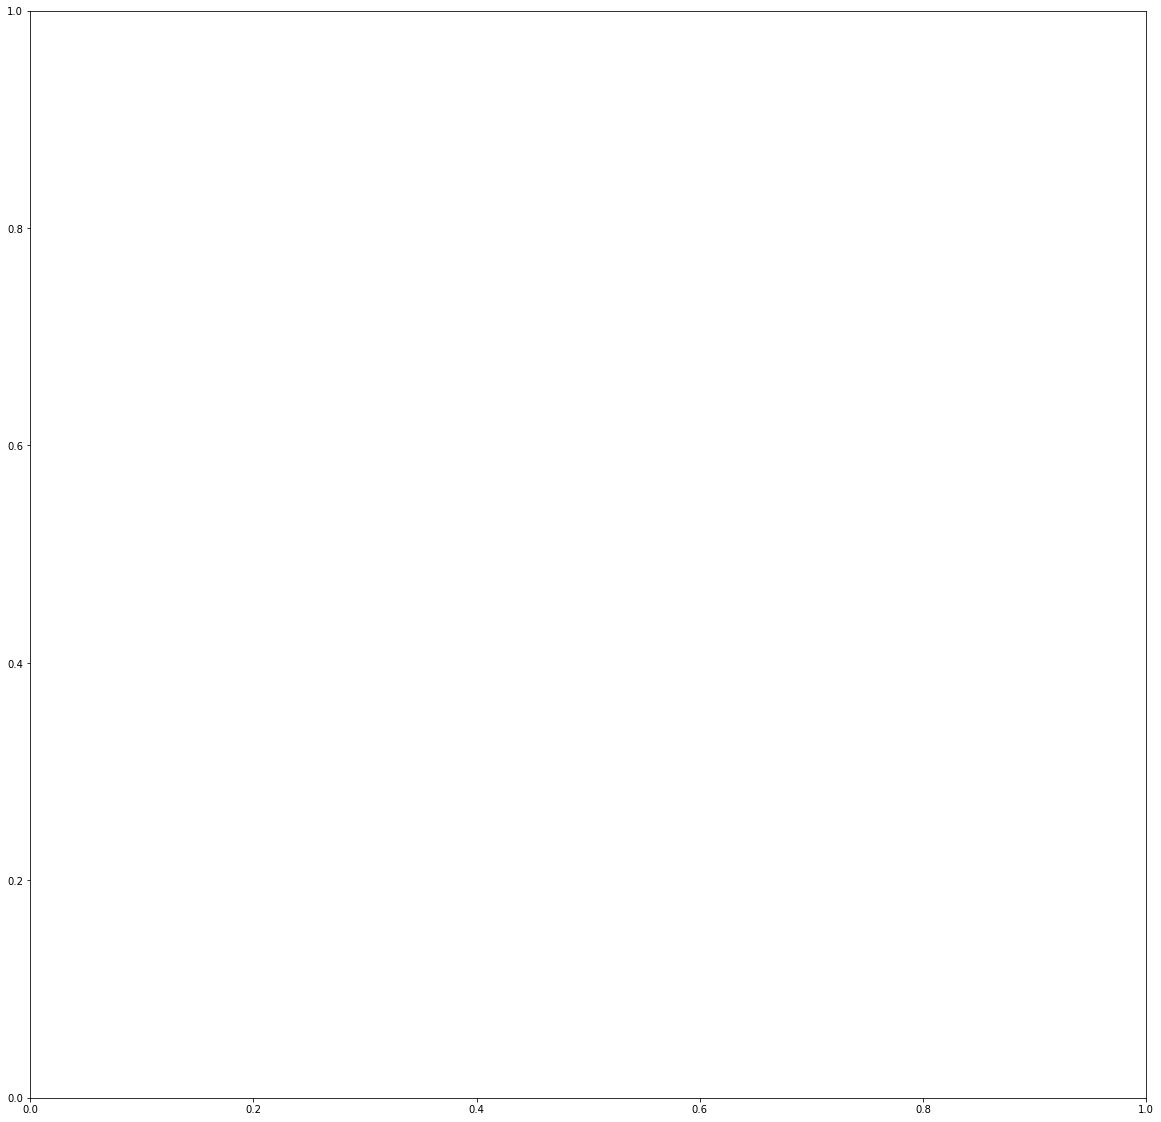

In [156]:
# let's look at the predictive power score just based on the first order
df_temp = df.drop(['Cust_ID','Avg_Order','Orders', 'Sub_Total', 'Ship_Total', 'Refund_Total', 'Marketing_lf', 'Total_Items', 'Avg_Items', 'last_order', 'Disc_Total', ], axis=1)
# calculates the predictive power score 
df_pps = pps.matrix(df_temp, 'Life_Total')
# 
fig, ax = plt.subplots(figsize=(20,20))
_ = sns.heatmap(df_pps, annot=True, ax=ax)
df_pps

### Calculate lifetime values based on lead SKU on their first purchase (what pulled them in)

In [55]:
# same for the lead SKU they first purchased
sku = rep.groupby('lead_sku').mean()

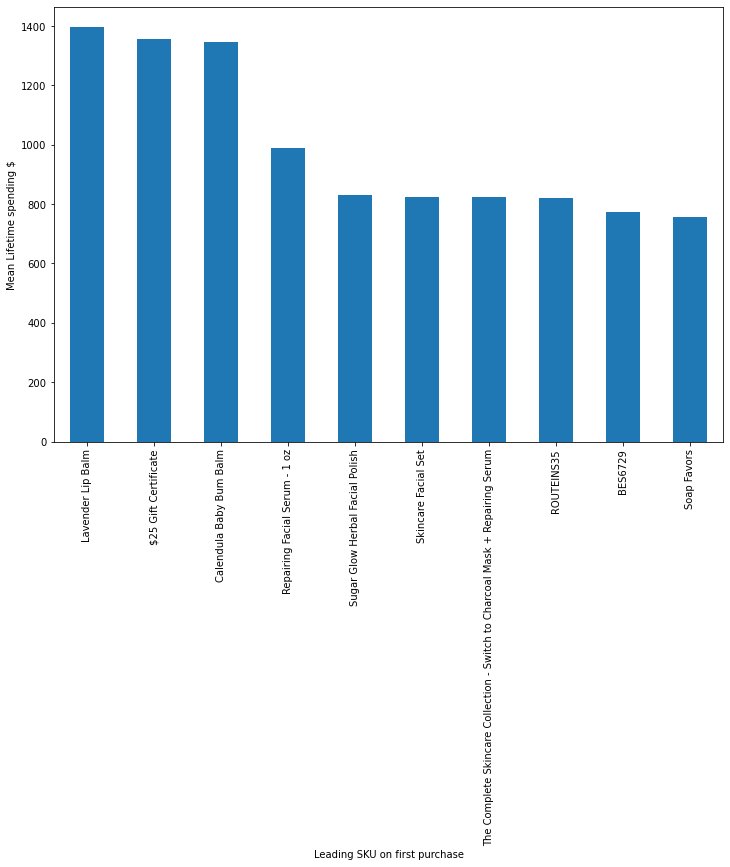

In [56]:
# sort these by lifetime total and only keep the top 10 to plot
sku_life = sku.sort_values(by=['Life_Total'], ascending=False)
sku_life10 = sku_life['Life_Total'].head(10)
# plot that
_ = sku_life10.plot(kind='bar', figsize=(12,8))
_ = plt.xlabel('Leading SKU on first purchase')
_ = plt.ylabel('Mean Lifetime spending $')
plt.savefig('sku_clv.png',bbox_inches='tight')

These could be misleading as the values associate some rarely sold SKU's could have couple astronomical repeat customers. To check on this law of small numbers, let's plot the total number of orders of these tops 10 SKU's.

In [57]:
# use index from the above top 10 list to see if these are really small number of total orders
sku_life10.index

Index(['Lavender Lip Balm', '$25 Gift Certificate', 'Calendula Baby Bum Balm',
       'Repairing Facial Serum - 1 oz', 'Sugar Glow Herbal Facial Polish',
       'Skincare Facial Set',
       'The Complete Skincare Collection - Switch to Charcoal Mask + Repairing Serum',
       'ROUTEINS35', 'BES6729', 'Soap Favors'],
      dtype='object', name='lead_sku')

In [58]:
rep[rep['lead_sku'].isin(sku_life10.index.tolist())]

,Cust_ID,Life_Total,Avg_Order,first_total,Orders,Sub_Total,Ship_Total,Refund_Total,Marketing_lf,Marketing_first,...,Disc_Total,Vendor,Emp,Source,ship_bill,Area_Code,Ship_Zip,lead_sku,repeat,weekday
322,3.525954e+08,168.20,84.100000,129.00,2,150.00,6.95,0.00,2,1,...,0.00,0.0,False,web,True,408,95050,Soap Favors,True,Tuesday
497,1.173126e+09,154.95,77.475000,101.00,2,149.00,5.95,0.00,1,0,...,11.00,0.0,False,web,True,unknown,39154,Skincare Facial Set,True,Sunday
1130,5.733556e+09,306.87,102.290000,151.71,3,284.80,0.00,0.00,3,1,...,35.20,0.0,False,web,True,714,92870,The Complete Skincare Collection - Switch to C...,True,Thursday
1185,5.952540e+09,148.03,37.007500,23.80,4,102.00,40.93,23.80,0,0,...,0.00,0.0,False,web,True,403,T2Y 4B6,Calendula Baby Bum Balm,True,Friday
1527,6.241153e+11,957.32,87.029091,151.71,11,856.80,41.18,18.00,4,1,...,99.40,0.0,False,web,True,714,92867,The Complete Skincare Collection - Switch to C...,True,Sunday
1568,7.081296e+11,277.60,138.800000,140.80,2,277.60,0.00,0.00,2,1,...,50.40,0.0,False,web,True,330,44720,The Complete Skincare Collection - Switch to C...,True,Monday
1596,7.404840e+11,269.04,67.260000,72.93,4,250.00,8.89,0.00,1,1,...,3.05,0.0,False,web,True,unknown,93704,Repairing Facial Serum - 1 oz,True,Wednesday
1826,1.017024e+12,234.04,33.434286,22.75,7,207.60,16.62,0.00,4,1,...,16.40,0.0,False,web,True,760,92630,Calendula Baby Bum Balm,True,Tuesday
1926,1.071905e+12,1343.46,83.966250,113.40,16,1236.67,29.84,0.00,10,1,...,154.28,0.0,False,web,True,270,92694,Soap Favors,True,Monday
2111,1.148028e+12,1357.18,84.823750,27.01,16,1283.18,39.50,0.00,8,1,...,107.08,0.0,False,web,True,714,92630,$25 Gift Certificate,True,Friday


Only 24 purchases with these 10 items as the lead! That means that ALL of those average were messed up by the law of small numbers. 

### Let's look at the total lifetime purchase of all customers based on the lead SKU

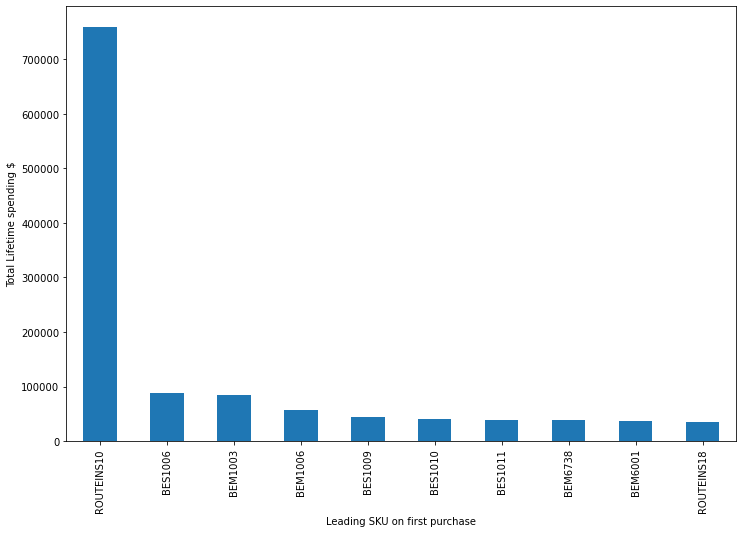

In [59]:
# same for the lead SKU they first purchased
sku_tot = rep.groupby('lead_sku').sum()
# sort these by lifetime total and only keep the top 10 to plot
sku_tot_lf = sku_tot.sort_values(by=['Life_Total'], ascending=False)
sku_tot_lf10 = sku_tot_lf['Life_Total'].head(10)
# plot that
_ = sku_tot_lf10.plot(kind='bar', figsize=(12,8))
_ = plt.xlabel('Leading SKU on first purchase')
_ = plt.ylabel('Total Lifetime spending $')

There appears to be a strong lead by one SKU. Let's see how that average lifetime spending compares to the average lifetime spending of every other SKU.

In [60]:
# stats for lifetime total spending - ALL SKU's
df['Life_Total'].describe()

count    39746.000000
mean       102.501845
std        142.814296
min          3.000000
25%         32.980000
50%         61.960000
75%        107.250000
max       4813.390000
Name: Life_Total, dtype: float64

In [61]:
# stats for lifetime total spending for SKU = ROUTEINS10
df[df['lead_sku'] == 'ROUTEINS10']['Life_Total'].describe()

count    19373.000000
mean        77.604332
std         95.807510
min          3.000000
25%         32.980000
50%         54.970000
75%         71.980000
max       2542.220000
Name: Life_Total, dtype: float64

That's interesting; more customers are acquired with that SKU, but those customer have a lower average lifetime spending than customers acquired through other SKU's. <br>
Let's look at the stats for SKU's

In [62]:
df['lead_sku'].value_counts().head(25)

ROUTEINS10    19373
BES1006        2214
BEM1003        1472
BEM1006        1451
BEM6738         693
BES1009         584
BEM6001         579
BEM6728         450
BEM6007         441
BEM6739         377
BES1011         371
BEM6008         366
ROUTEINS18      348
BES3003         301
BES1010         301
BEM1009         292
BEM1007         283
BES5001         271
ROUTEINS19      246
BE523           239
BEM6729         230
BES1005         226
ROUTEINS22      214
BEM6003         209
BEM6737         209
Name: lead_sku, dtype: int64

These could be good features for the model, but we need to eliminate the really small values. Any SKU not in the top 25 is not worth considering, so we we just change those to "Other"

In [63]:
# extract the name of the top 25 SKU's
SKU25 = df['lead_sku'].value_counts().head(25).index.tolist()
# extract the name of all SKU's
SKU_ALL = df['lead_sku'].unique().tolist()
# list of all SKU's that are NOT in the top 25
SKU_other = [x for x in SKU_ALL if x not in SKU25]
# use list of other domains to replace their value
df['lead_sku'].replace(to_replace=SKU_other, value='other', inplace=True)
df['lead_sku'].value_counts()

ROUTEINS10    19373
other          8006
BES1006        2214
BEM1003        1472
BEM1006        1451
BEM6738         693
BES1009         584
BEM6001         579
BEM6728         450
BEM6007         441
BEM6739         377
BES1011         371
BEM6008         366
ROUTEINS18      348
BES3003         301
BES1010         301
BEM1009         292
BEM1007         283
BES5001         271
ROUTEINS19      246
BE523           239
BEM6729         230
BES1005         226
ROUTEINS22      214
BEM6737         209
BEM6003         209
Name: lead_sku, dtype: int64

That looks much better and is now a usable feature in the model. <br>
Let's see if there is any lead SKU's from these common ones that stands out.

In [64]:
# same for the lead SKU they first purchased
sku = df.groupby('lead_sku').mean()

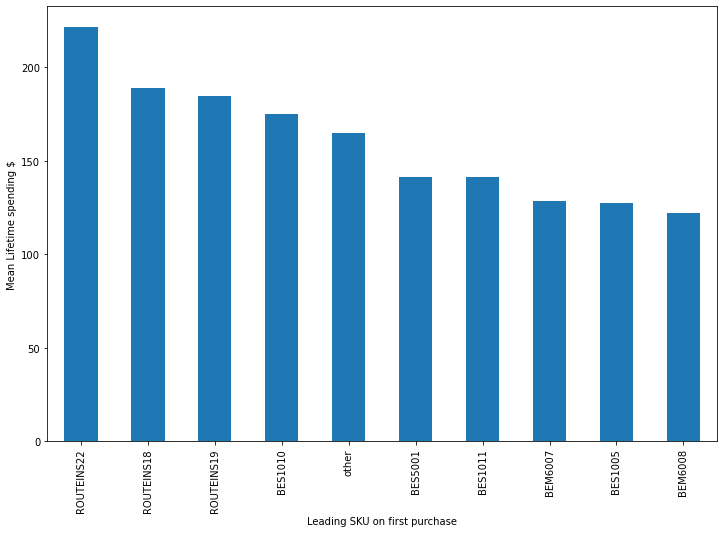

In [65]:
# sort these by lifetime total and only keep the top 10 to plot
sku_life = sku.sort_values(by=['Life_Total'], ascending=False)
sku_life10 = sku_life['Life_Total'].head(10)
# plot that
_ = sku_life10.plot(kind='bar', figsize=(12,8))
_ = plt.xlabel('Leading SKU on first purchase')
_ = plt.ylabel('Mean Lifetime spending $')
plt.savefig('sku2_clv.png',bbox_inches='tight')

That's some pretty impressive differences. Let's test on the top one to see it's a significant difference. <br>
Test if customers acquired on ROUTEINS22 are statistically significant over average customer

In [66]:
df[df['lead_sku'] == 'ROUTEINS22']

,Cust_ID,Life_Total,Avg_Order,first_total,Orders,Sub_Total,Ship_Total,Refund_Total,Marketing_lf,Marketing_first,...,Emp,Source,ship_bill,Area_Code,Ship_Zip,lead_sku,repeat,weekday,life_lg,mon
8215,1.906382e+12,497.27,248.6350,335.71,2,449.35,47.92,0.0,0,0,...,False,web,False,unknown,10038,ROUTEINS22,True,Sunday,2.696592,December
8709,1.915182e+12,366.33,183.1650,331.35,2,366.33,0.00,0.0,0,0,...,False,web,True,405,73018,ROUTEINS22,True,Tuesday,2.563872,December
8996,1.920584e+12,124.34,124.3400,124.34,1,124.34,0.00,0.0,0,0,...,False,web,True,716,14127,ROUTEINS22,False,Monday,2.094611,December
9439,1.924739e+12,163.35,163.3500,163.35,1,163.35,0.00,0.0,1,1,...,False,web,True,unknown,22903,ROUTEINS22,False,Saturday,2.213119,December
9573,1.925621e+12,163.35,163.3500,163.35,1,163.35,0.00,0.0,1,1,...,False,web,True,406,59405,ROUTEINS22,False,Sunday,2.213119,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39377,2.741807e+12,543.67,135.9175,166.29,4,543.67,0.00,0.0,3,0,...,False,web,True,651,55068,ROUTEINS22,True,Friday,2.735335,January
39387,2.742928e+12,274.68,137.3400,130.68,2,274.68,0.00,0.0,2,1,...,False,1356615,True,518,12309,ROUTEINS22,True,Friday,2.438827,July
39616,2.762807e+12,168.95,168.9500,168.95,1,168.95,0.00,0.0,0,0,...,False,294517,True,unknown,08096,ROUTEINS22,False,Friday,2.227758,September
39647,2.767236e+12,415.70,207.8500,163.35,2,415.70,0.00,0.0,0,0,...,False,web,True,818,85344,ROUTEINS22,True,Sunday,2.618780,March


In [67]:
# testing if customers in November are statistically significant in their lifetime purchases over customers acquired in September
ttest_ind(df[df['lead_sku'] == 'ROUTEINS22']['Life_Total'], df['Life_Total'])

Ttest_indResult(statistic=12.167103915304788, pvalue=5.34484688266091e-34)

##### Marketing push
As pointed out early, there was a massive increase in sales starting in August 2019. We want to see if those customer acquired after 2019 have spend significantly less over their lifetime (it is a shorter lifetime).

In [68]:
from dateutil import tz 
campaign_start = datetime.datetime(2019, 8, 1, tzinfo=tz.gettz('US/Eastern'))
df['boost'] = df['first_order'] > campaign_start

,Cust_ID,Life_Total,Avg_Order,first_total,Orders,Sub_Total,Ship_Total,Refund_Total,Marketing_lf,Marketing_first,Total_Items,Avg_Items,first_items,Disc_Total,Vendor,Emp,ship_bill,repeat,life_lg
boost,,,,,,,,,,,,,,,,,,,
False,4.525508e+11,104.343305,52.417244,52.567157,1.843399,95.79242,5.635345,1.564556,1.159620,0.622519,4.229077,2.096999,2.072908,7.835953,0.028473,0.000000,0.909836,0.276531,1.757182
True,2.234564e+12,102.387799,62.925164,60.683611,1.528749,99.76352,1.434085,2.193248,0.647831,0.399754,3.560970,2.181837,2.125681,1.883718,0.584135,0.000053,0.920942,0.241904,1.819549


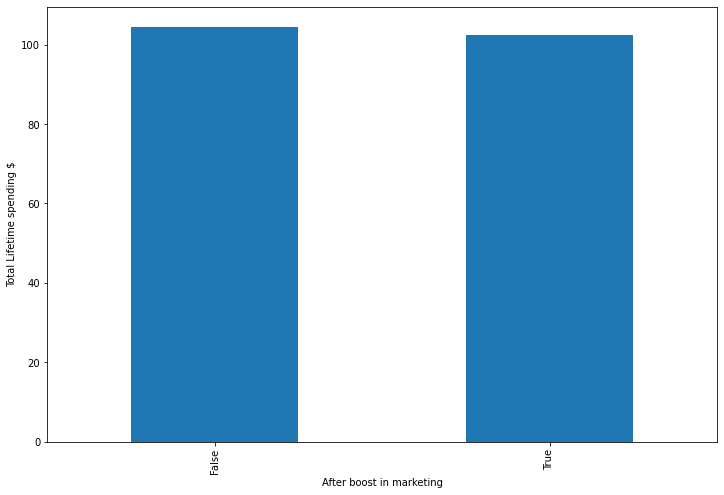

In [69]:
# group the results
df_camp = df.groupby('boost').mean()

# plot the results in a bar graph
_ = df_camp['Life_Total'].plot(kind='bar', figsize=(12,8))
_ = plt.xlabel('After boost in marketing')
_ = plt.ylabel('Total Lifetime spending $')
df_camp

This is very interesting; the customers acquired after the big boost in market were better in some metrics. We'll include this in our models because it could be relevant in differentiate customer behavior.

In [70]:
# to make this column usable, let's convert to 1's and 0's for True and False respectively
df['boost'].replace(to_replace=[True, False], value=[1,0], inplace=True)

To be fair in the comparison, we should look at just the CLV in the first 6 months after the first order.

In [ ]:
df['CLV_6mon'] = 

##### Look for outliers and package data up

Before we move on to look at orders and some insights that could be pulled from those, we should remove outliers from this data set of orders. Let's look for those. We will be doing our modeling on this customer DF and looking for customer lifetime value based on the characteristics of their first purchase.

In [173]:
# X values based on a customer's first order
X = df[['first_total', 'Marketing_first','first_items', 'first_order', 'server', 'Vendor', 'Emp',
       'Source', 'ship_bill', 'Area_Code', 'Ship_Zip', 'lead_sku', 'weekday', 'mon', 'boost']]

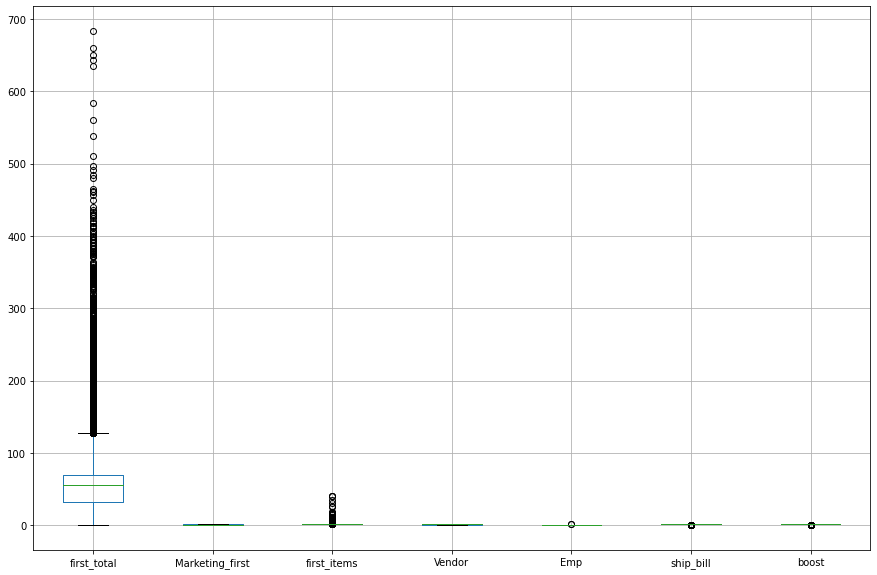

In [174]:
_ = X.boxplot(figsize=(15,10))

Looks like first order total and first order items have some outliers. From an earlier plot, they definitely look exponential. Let's add their log component to the DF and look at the correlation again.

In [175]:
df = df[df['first_total'] > 1]
df['first_tot_lg'] = np.log10(df['first_total'])
df['first_it_lg'] = np.log10(df['first_items'])

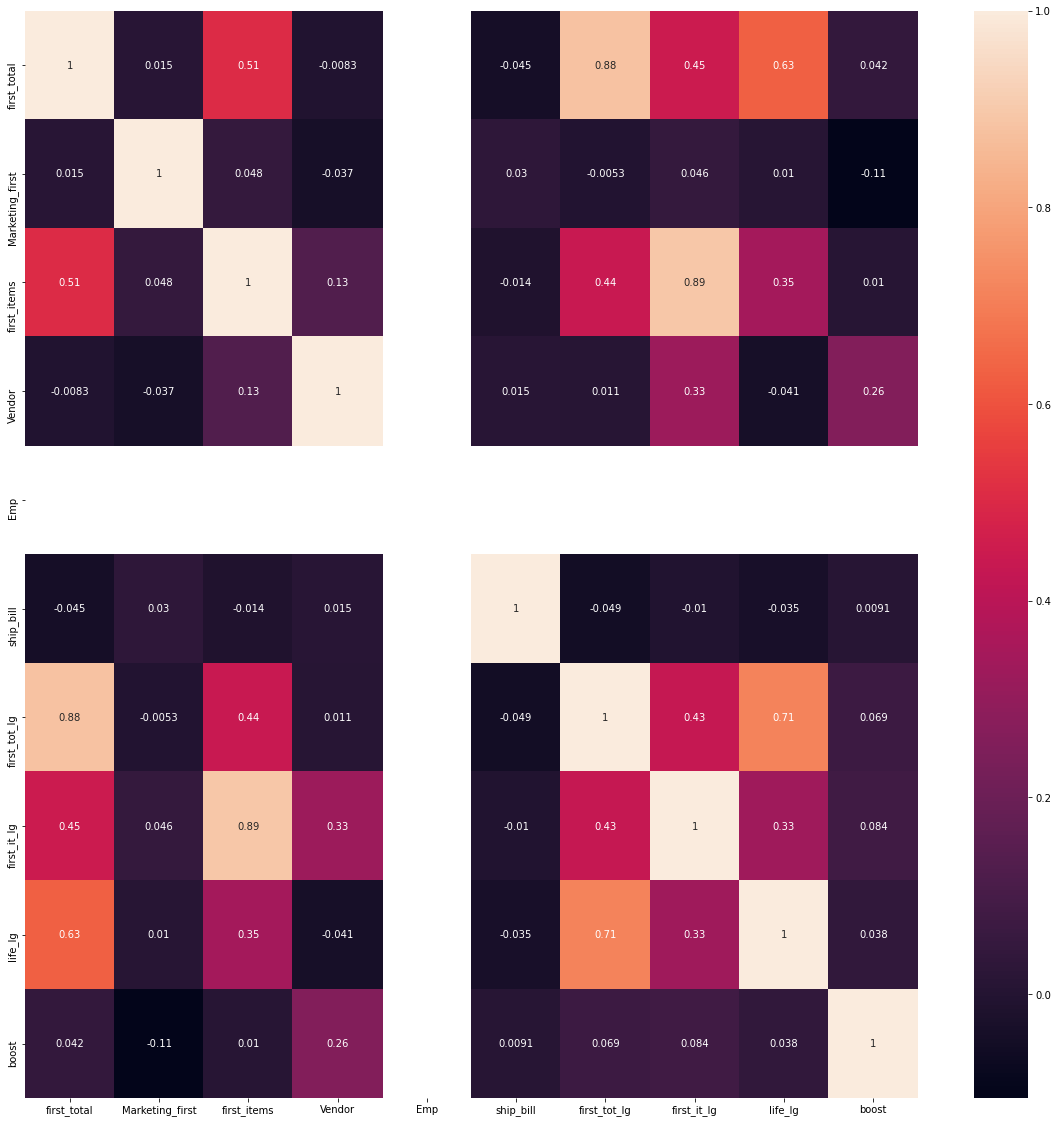

In [176]:
X = df[['first_total', 'Marketing_first','first_items', 'first_order', 'server', 'Vendor', 'Emp',
       'Source', 'ship_bill', 'Area_Code', 'Ship_Zip', 'lead_sku', 'weekday', 'mon', 'first_tot_lg','first_it_lg', 'life_lg', 'boost']]
# look at correlation again
# let's look at the correlation coefficient just based on the first order
corr = X.corr()
fig, ax = plt.subplots(figsize=(20,20))
_ = sns.heatmap(corr, annot=True, ax=ax)

Log of the first order total has a 0.71 correlation to the log of the lifetime total. That's excellent! <br>
Let's extract the Y value (life_lg) and the X (everything else in that first order). We'll package these up and save them for the modeling

In [177]:
# based on this, let's drop Emp from X
X.drop('Emp', axis=1, inplace=True)

C:\Users\sjrek\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [178]:
# ship bill also look not useful; let's drop that
X.drop('ship_bill', axis=1, inplace=True)

In [179]:
# created the separate X and Y
Y = X['life_lg']
X = X.drop('life_lg', axis=1)

In [180]:

# export these suckers
os.chdir("C:\Springboard\Github\Capstone2_cust\Intermediate_Data")
# let's save the Order to both pickle and CSV
X.to_pickle("X3.pkl")
X.to_csv("X3.csv")
Y.to_pickle("Y3.pkl")
Y.to_csv("Y3.csv")

# Part 2
## let's take a look at the order data so that we can calculate:
## retention rate, repeat rate, and churn rate

In [181]:
# load the pickled version of the Customer DF (Cust)
Orders = pickle.load(open("Order4.pkl", "rb"))
# look at the first 10 rows of this file
Orders.head(10)

,Financial Status,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Total,Discount Amount,Shipping Method,Created at,Lineitem quantity,...,Employee,Tags,Source,Lineitem discount,Server,ship_bill,Area_Code,Cust_ID,ITEMS,compared
Name,,,,,,,,,,,,,,,,,,,,,
#10000,paid,fulfilled,1,8.0,0.00,8.62,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 15:49:51+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,2.029549e+12,1,NaN
#10001,paid,fulfilled,1,44.0,0.00,44.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 16:22:12+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,2.604838e+12,2,NaN
#10002,paid,fulfilled,1,34.0,0.00,34.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 16:57:00+00:00,1,...,False,NaN,web,0.0,yahoo.com,False,813,1.928534e+12,1,-1.0
#10003,paid,fulfilled,1,34.0,0.00,34.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 17:15:01+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,1.825239e+12,1,-1.0
#10004,paid,fulfilled,1,8.0,0.00,8.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 17:26:41+00:00,1,...,False,NaN,web,0.0,gmail.com,True,513,1.886785e+12,1,NaN
#10005,paid,fulfilled,1,34.0,14.55,48.55,0.0,USPS First Class International,2019-10-25 17:26:46+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,1.825258e+12,1,-1.0
#10006,partially_refunded,fulfilled,1,56.0,8.99,64.99,0.0,Priority Mail,2019-10-25 18:24:25+00:00,1,...,False,NaN,web,0.0,gmail.com,False,NaN,1.825330e+12,2,NaN
#10007,paid,fulfilled,1,80.0,0.00,80.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 18:38:36+00:00,1,...,False,NaN,web,0.0,gmail.com,False,NaN,1.825345e+12,5,NaN
#10008,paid,fulfilled,1,72.0,0.00,72.00,8.0,USPS First Class Package (2-5 Business Days),2019-10-25 18:59:44+00:00,1,...,False,NaN,web,0.0,gmail.com,True,NaN,2.010503e+12,4,NaN


In [182]:
Orders.shape

(61520, 29)

This looks good and loaded. I want to add a column with weekday

In [183]:
Orders['weekday'] = Orders['Created at'].dt.day_name()

Since we are looking for year-over-year retention rate (and repeat rate and churn rate) we need to group the order data by year. Let's take a look at those values now before considering the considering those rates.

In [184]:
Orders.groupby(Orders["Created at"].dt.year).sum()

,Accepts Marketing,Subtotal,Shipping,Total,Discount Amount,Lineitem quantity,Lineitem price,Lineitem compare at price,Lineitem requires shipping,Refunded Amount,Vendor,Outstanding Balance,Employee,Lineitem discount,ship_bill,Cust_ID,ITEMS,compared
Created at,,,,,,,,,,,,,,,,,,
2012,13,7.180000e+02,109.18,8.374200e+02,56.00,25,372.00,0.00,22.0,0.00,0.0,0.00,0.0,0.0,19.0,6.062206e+11,63,0.000000
2013,112,4.522300e+03,750.92,5.415640e+03,297.50,184,2599.00,0.00,142.0,89.72,0.0,0.00,0.0,0.0,126.0,5.895669e+13,308,0.000000
2014,152,8.258700e+03,772.29,9.405470e+03,359.38,411,3204.90,173.72,189.0,0.00,0.0,30.00,0.0,0.0,171.0,1.079906e+14,737,13.089277
2015,398,2.029540e+04,2041.38,2.313385e+04,1581.00,764,9884.30,364.70,514.0,189.29,0.0,150.00,0.0,0.0,442.0,1.895902e+14,1589,48.285714
2016,356,3.710759e+04,1778.51,4.065904e+04,1282.31,756,17923.01,1287.25,686.0,113.92,0.0,-13.81,0.0,0.0,634.0,4.160625e+14,1641,75.714029
2017,948,6.963005e+04,1359.40,7.387878e+04,5490.04,1254,40790.80,1929.00,1164.0,868.18,0.0,-200.00,0.0,0.0,1052.0,1.240192e+15,2385,inf
2018,547,8.750564e+04,5769.28,9.507321e+04,9477.43,1539,42847.82,-5316.00,1409.0,269.11,29.0,-4.64,0.0,0.0,1313.0,2.089229e+15,3396,-99.000000
2019,9536,8.058769e+05,18019.04,8.326500e+05,24563.98,14837,281569.12,-53279.27,9022.0,26823.96,5414.0,38.48,1.0,0.0,13349.0,2.788267e+16,33078,inf
2020,14887,2.922089e+06,36137.68,2.992993e+06,49127.49,43446,795134.63,168887.22,19033.0,57364.29,23826.0,923.71,7.0,0.0,39385.0,1.026025e+17,99968,947.392728


### Repeat customer purchasing for the first time by day of week


In [185]:
# percentage of repeat customer by day of week they were first acquired
# repeat customer purchasing on that day of week for the first time / all purchases on that day of the week

## Retention Rate

In [186]:
# all purchases in 2018
pur18 = Orders[Orders["Created at"].dt.year == 2018]
# number of customers that purchased in 2018
cust18 = pur18.groupby('Cust_ID').count()
# counts up the rows of those unique customer that purchased in 2018
tot18 = cust18.shape[0]
tot18

744

In [187]:
# all purchases in 2018 and 2019
pur1819 = Orders[Orders["Created at"].dt.year.isin([2018,2019])]
# number of unique customers that purchased in 2018 or 2019
cust1819 = pur1819.groupby('Cust_ID').count()
# pur1819.groupby('Cust_ID').count()
tot1819 = cust1819.shape[0]
tot1819

11046

In [188]:
# all purchases in 2019
pur19 = Orders[Orders["Created at"].dt.year == 2019]
# number of unique customers that purchased in 2019
cust19 = pur19.groupby('Cust_ID').count()
# counts up the rows of those unique customer that purchased in 2019
tot19 = cust19.shape[0]
tot19

10546

In [189]:
# merge to find all of the customers that were purchased in both 2018 AND 2019
ret18 = pd.merge(cust18, cust19, how='inner', on='Cust_ID')
retent18 = ret18.shape[0]
retent18

244

That was the number of customer that purchased in 2018 that also purchase in 2019. They were retained from 2018 to 2019. Let's see the percentage

In [190]:
# percent of customer retained from 2018 to 2019
(retent18/tot18)*100

32.795698924731184

That was a good calculation of the number of customer that were retained from 2018 to 2019. It would be best if we generalize this to calculate the retention rate for each year.

### General retention rate calculation that can be applied to all years

In [191]:
# see if I can do this for all of the years - generalize
pur = {}
cust = {}
ret = {}
# creates dictionary of dataframes with orders from each year
for yr in range(2012,2021):
    # calculates the purchase in a specific year
    pur[yr] = Orders[Orders["Created at"].dt.year == yr]
    cust[yr] = pur[yr].groupby('Cust_ID').count()
    
# merges those dataframes to calculate the retention rate
for yr in range(2012,2020):
    retent = pd.merge(cust[yr], cust[yr+1], how='inner', on='Cust_ID')
    ret[yr] = (retent.shape[0]/cust[yr].shape[0])*100
ret

{2012: 19.047619047619047,
 2013: 16.363636363636363,
 2014: 24.242424242424242,
 2015: 21.179624664879356,
 2016: 29.898989898989896,
 2017: 34.394904458598724,
 2018: 32.795698924731184,
 2019: 20.77564953536886}

I'm so stoked to get these number year over year. Let's plot.

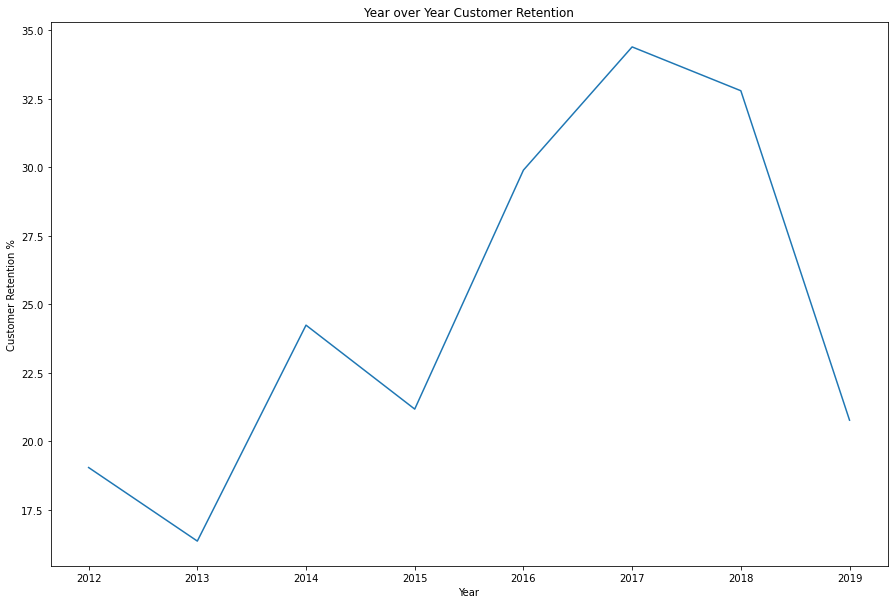

In [192]:
# convert to Dataframe
rentention = pd.DataFrame.from_dict(ret, orient='index', columns=['retention'])
# graph
_ = rentention.plot(kind='line', figsize=(15,10), legend=None)
_ = plt.xlabel('Year')
_ = plt.ylabel('Customer Retention %')
_ = plt.title('Year over Year Customer Retention')
plt.savefig('retention_yr.png',bbox_inches='tight')

Notice a dip from 2018 to 2019. This maybe because a LOT more customer were acquired in 2019 than in 2018; also 2020 is not over yet (sales data only through September), so we are not counting a completed time period for Retention rate in 2019. <br>
<br>
That concludes the look at retention rate for now. We can actually use this retention rate to calculate churn rate.

# Churn Rate

We will take a simplistic view of Churn (since this is not SaaS) of Churn = 1 - Retention Rate

In [193]:
# simplistic view of churn and retention rate
churn = 100 - rentention['retention']
churn.columns = ['churn']

# Customer Lifespan

Average customer lifespan should be easy to calculate from Churn as 1/churn

In [194]:
# since churn is a percentage rather than fraction, we do lifespan = 100 / churn
lifespan = 100 / churn
lifespan

2012    1.235294
2013    1.195652
2014    1.320000
2015    1.268707
2016    1.426513
2017    1.524272
2018    1.488000
2019    1.262238
Name: retention, dtype: float64

This is the average customer lifespan (in years) for the customers that purchased in each of the years. <br>
Let's plot it out.

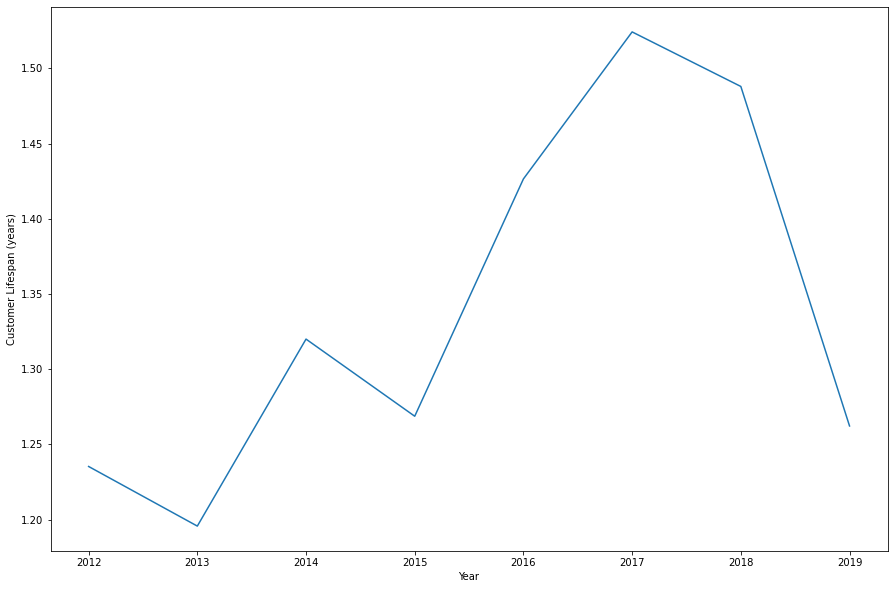

In [195]:
_ = lifespan.plot(kind='line', figsize=(15,10), legend=None)
_ = plt.xlabel('Year')
_ = plt.ylabel('Customer Lifespan (years)')

This just mirrors customer retention rate, as expected. Great to see that validate.

# Repeat Rate

In [196]:
# determine the customer numbers that are duplicated in the dataframe - those are the repeat (2nd, 3rd, 4th, etc. orders)
Rep_ord = Orders['Cust_ID'].duplicated()
# create another dataframe with only repeated orders
Repeat_Orders = Orders[Rep_ord]
# look at the DF
Repeat_Orders

,Financial Status,Fulfillment Status,Accepts Marketing,Subtotal,Shipping,Total,Discount Amount,Shipping Method,Created at,Lineitem quantity,...,Tags,Source,Lineitem discount,Server,ship_bill,Area_Code,Cust_ID,ITEMS,compared,weekday
Name,,,,,,,,,,,,,,,,,,,,,
#10062,paid,fulfilled,1,46.00,0.0,49.34,0.0,USPS First Class Package (2-5 Business Days),2019-10-26 09:09:23+00:00,1,...,NaN,web,0.0,gmail.com,True,NaN,1.825949e+12,1,NaN,Saturday
#10141,paid,fulfilled,1,43.20,0.0,43.20,0.0,USPS First Class Package (2-5 Business Days),2019-10-27 09:54:48+00:00,1,...,recurring_order,457101,0.0,aol.com,True,NaN,2.545096e+12,2,NaN,Sunday
#1024,paid,fulfilled,1,32.00,5.0,37.00,0.0,USPS Priority Mail,2012-12-30 02:13:36+00:00,1,...,NaN,web,0.0,gmail.com,True,NaN,1.534371e+08,4,NaN,Sunday
#10240,paid,fulfilled,1,30.00,0.0,30.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-29 01:08:53+00:00,1,...,NaN,web,0.0,gmail.com,True,NaN,2.531504e+12,2,NaN,Tuesday
#10263,paid,fulfilled,1,22.00,0.0,23.60,0.0,USPS First Class Package (2-5 Business Days),2019-10-29 04:51:40+00:00,1,...,NaN,web,0.0,gmail.com,True,951,1.833243e+12,1,NaN,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
#9995,paid,fulfilled,1,16.00,0.0,16.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 14:09:45+00:00,2,...,NaN,web,0.0,custom,True,NaN,1.824908e+12,2,NaN,Friday
#9996,paid,fulfilled,1,32.00,0.0,34.48,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 14:33:07+00:00,1,...,NaN,web,0.0,sbcglobal.net,True,714,2.564832e+12,1,NaN,Friday
#9997,paid,fulfilled,1,78.00,0.0,78.00,0.0,USPS First Class Package (2-5 Business Days),2019-10-25 15:04:13+00:00,1,...,recurring_order,457101,0.0,custom,True,NaN,1.994334e+12,3,NaN,Friday


this dataframe looks good; now we can use this with the general order dataframe to calculate our repeat rate for any time period

Let's calculate the repeat rate for each year

In [197]:
# see if I can do this for all of the years - generalize
repeat_rate = {}
total_yr = {}
repeat_yr = {}
# creates dictionary of dataframes with orders from each year
for yr in range(2012,2021):
    # calculates the repeat purchase in a specific year
    repeat_yr[yr] = Repeat_Orders[Repeat_Orders["Created at"].dt.year == yr].shape[0]
    total_yr[yr] = Orders[Orders["Created at"].dt.year == yr].shape[0]
    repeat_rate[yr] = (repeat_yr[yr] / total_yr[yr])*100
repeat_rate

{2012: 4.545454545454546,
 2013: 26.056338028169012,
 2014: 41.269841269841265,
 2015: 36.627906976744185,
 2016: 44.492753623188406,
 2017: 65.47008547008546,
 2018: 70.4088704088704,
 2019: 29.869321717485995,
 2020: 35.058878395709456}

These numbers make sense, as the it's hard to get more repeat business in just your first year; the sales increased significantly in 2019 from acquiring more new customers, so repeat business should be a smaller portion of the overall. <br>
<br>
Let's graph the results to see how it looks.

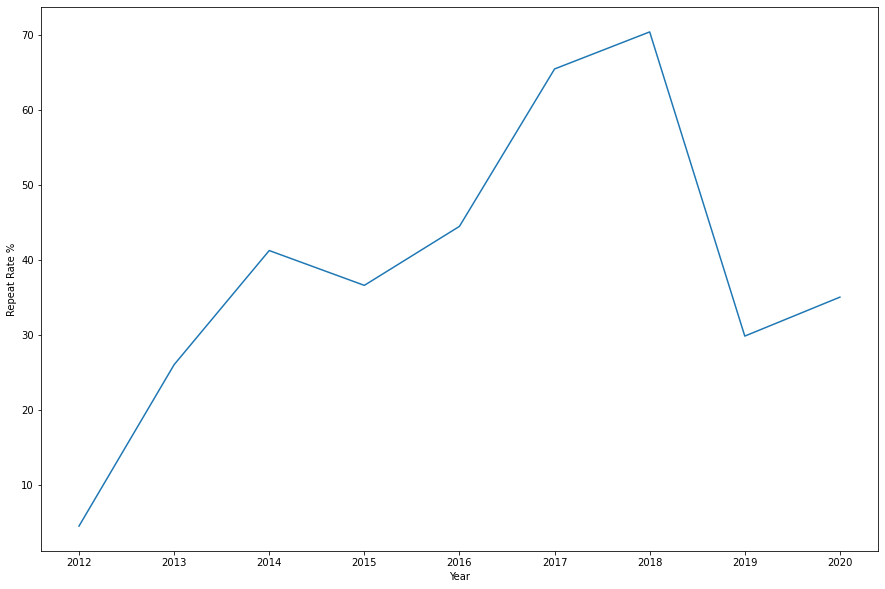

In [199]:
# convert to Dataframe
repeat = pd.DataFrame.from_dict(repeat_rate, orient='index', columns=['repeat_rate'])
# graph
_ = repeat.plot(kind='line', figsize=(15,10), legend=None)
_ = plt.xlabel('Year')
_ = plt.ylabel('Repeat Rate %')
plt.savefig('year_repeat.png',bbox_inches='tight')

This looks good. It would be good for us to also consider repeat rate by day of the week or month

In [200]:
# calculating repeat rate by day of the week
# see if I can do this for all of the weekdays - generalize
repeat_rt_day = {}
total_day = {}
repeat_day = {}
# creates dictionary of dataframes with orders from each weekday
for day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']:
    # calculates the repeat purchase in a specific year
    repeat_day[day] = Repeat_Orders[Repeat_Orders["weekday"] == day].shape[0]
    total_day[day] = Orders[Orders["weekday"] == day].shape[0]
    repeat_rt_day[day] = (repeat_day[day] / total_day[day])*100
repeat_rt_day

{'Monday': 35.522066738428414,
 'Tuesday': 37.02908917501192,
 'Wednesday': 38.26756946065842,
 'Thursday': 37.14489480565791,
 'Friday': 37.55197782279561,
 'Saturday': 32.35451720072876,
 'Sunday': 30.048447478528956}

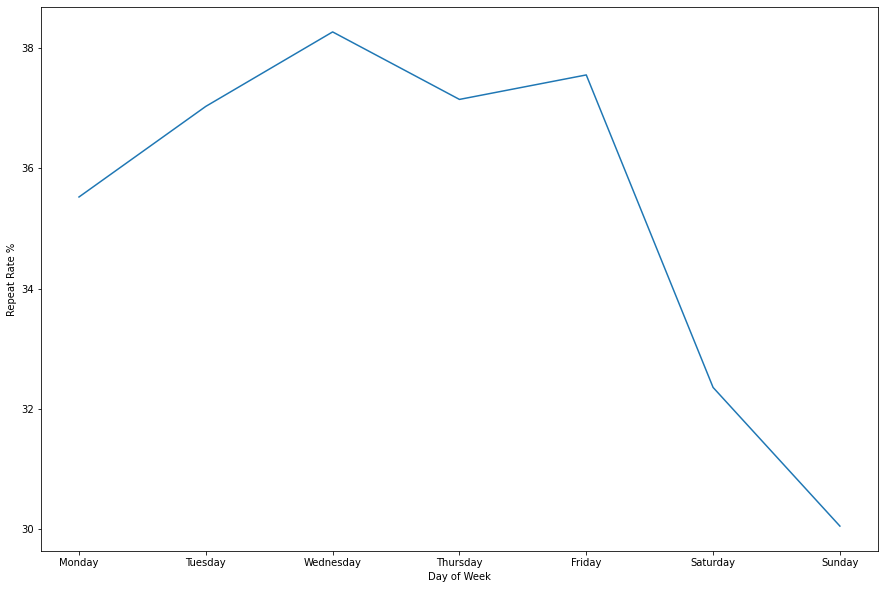

In [201]:
# convert to Dataframe
repeat_days = pd.DataFrame.from_dict(repeat_rt_day, orient='index', columns=['repeat_rate'])
# graph
_ = repeat_days.plot(kind='line', figsize=(15,10), legend=None)
_ = plt.xlabel('Day of Week')
_ = plt.ylabel('Repeat Rate %')
plt.savefig('weekday_repeat.png',bbox_inches='tight')

This is really interesting. It looked like repeat customer were acquired more on weekends with Wednesday and Thursday being a low point for acquiring new customers, but it looks like Wednesday, Thursday, and Friday are the days when we see the most repeat purchase (by a small margin).

In [91]:
# calculate repeat rate by month - same code as by year
# see if I can do this for all of the years - generalize
repeat_rate_m = {}
total_m = {}
repeat_m = {}
# creates dictionary of dataframes with orders from each year
for mon in range(1,13):
    # calculates the repeat purchase in a specific year
    repeat_m[mon] = Repeat_Orders[Repeat_Orders["Created at"].dt.month == mon].shape[0]
    total_m[mon] = Orders[Orders["Created at"].dt.month == mon].shape[0]
    repeat_rate_m[mon] = (repeat_m[mon] / total_m[mon])*100
repeat_rate_m


{1: 26.52058934642992,
 2: 35.613463626492944,
 3: 51.201011378002526,
 4: 28.85812072184194,
 5: 39.61485557083906,
 6: 38.645085933589186,
 7: 34.73883863437408,
 8: 40.59297718267523,
 9: 56.79225717248531,
 10: 46.82498709344347,
 11: 16.874385044276814,
 12: 29.4362292051756}

Wow! That is drastically different. Let's graph it

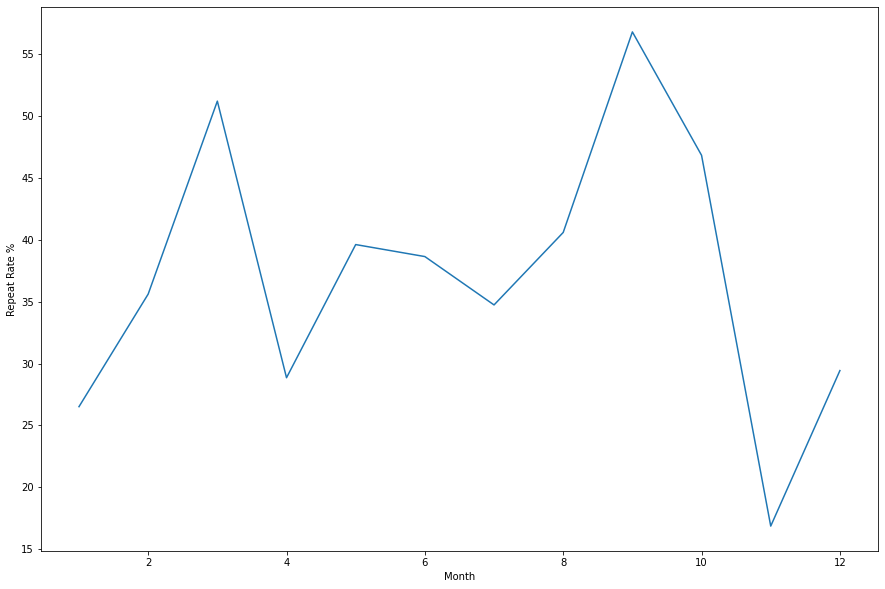

In [93]:
# convert to Dataframe
repeat_months = pd.DataFrame.from_dict(repeat_rate_m, orient='index', columns=['repeat_rate'])
# graph
_ = repeat_months.plot(kind='line', figsize=(15,10), legend=None)
_ = plt.xlabel('Month')
_ = plt.ylabel('Repeat Rate %')
plt.savefig('month_repeat.png',bbox_inches='tight')

Think about other features that we could add: time between purchase, average dollar, difference in dollar <br>
Calculate customer lifetime value <br>
